In [1]:
import os
import yaml
import tqdm
import time
import pandas as pd
import numpy as np
import sys
import itertools
from collections import defaultdict
sys.path.append("./src/")
from preprocess.imdb_reviews import PreprocessIMDB

from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

### Random

In [1]:
!python src/main.py --config_path "D:\Learning\NLP\Projects\scratch_nlp\configs\bert.yaml" --algo "BERT" --log_folder "D:\Learning\NLP\Projects\scratch_nlp\output\bert"

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shanmukh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Traceback (most recent call last):
  File "d:\Learning\NLP\Projects\scratch_nlp\src\main.py", line 62, in <module>
    main()
  File "d:\Learning\NLP\Projects\scratch_nlp\src\main.py", line 58, in main
    algo.run()
  File "d:\Learning\NLP\Projects\scratch_nlp\src\core\bow\bow.py", line 16, in run
    self.fit_transform()
  File "d:\Learning\NLP\Projects\scratch_nlp\src\core\bow\bow.py", line 30, in fit_transform
    self.fit(text_ls, y)
  File "d:\Learning\NLP\Projects\scratch_nlp\src\core\bow\bow.py", line 23, in fit
    for text in text_ls:
TypeError: 'NoneType' object is not iterable


In [1]:
import pandas as pd

dict_ = {
    "A": 2,
    "B": 4
}
df = pd.DataFrame(dict_, index=[0]).T
df

,0
A,2
B,4


In [36]:
import numpy as np

arr = np.load("./output/bow/Text Vector.npy")
arr.shape

(600, 9834)

In [4]:
import os

x = os.environ['PATH']
x.split(";")

['e:\\anaconda\\envs\\nlp_env',
 'C:\\Program Files\\dotnet\\',
 'C:\\Program Files\\Git\\cmd',
 'E:\\anaconda\\Scripts',
 'E:\\anaconda\\Library',
 'E:\\anaconda\\Library\\bin',
 'E:\\anaconda\\Library\\mingw-w64\\bin',
 'C:\\Users\\shanmukh\\AppData\\Local\\Programs\\Python\\Python38-32\\Scripts\\',
 'C:\\Users\\shanmukh\\AppData\\Local\\Programs\\Python\\Python38-32\\',
 'C:\\Users\\shanmukh\\AppData\\Local\\Microsoft\\WindowsApps',
 'C:\\Users\\shanmukh\\AppData\\Local\\GitHubDesktop\\bin',
 'C:\\Program Files\\mingw-w64\\x86_64-8.1.0-posix-seh-rt_v6-rev0\\mingw64\\bin',
 'C:\\Users\\shanmukh\\AppData\\Local\\Microsoft\\WindowsApps',
 'D:\\heroku\\bin',
 'E:\\vscode\\Microsoft VS Code\\bin',
 'E:\\PyCharm\\PyCharm Community Edition 2021.2.3\\bin',
 '',
 'E:\\anaconda',
 'E:\\anaconda\\Library\\bin',
 'E:\\anaconda\\Library\\bin',
 'E:\\apache-jena-4.7.0\\bat',
 'C:\\Program Files\\Java\\jdk-19\\bin',
 'C:\\Program Files\\Common Files\\Oracle\\Java\\javapath',
 'C:\\Users\\shanmukh\

In [27]:
import pandas as pd

df = pd.read_csv(r"D:\Learning\NLP\Projects\scratch_nlp\output\ngram\Vocab Frequency.csv")
df.head()

,Word,Frequency
0,better whatev person love one,1
1,gate treasur hunter oh excus,1
2,atmospher place jump scare also,1
3,deliv like joke either riley,1
4,forsaken desert giant forest full,1


In [28]:
df.sort_values(by="Frequency", ascending=False, ignore_index=True, inplace=True)
df.head()

,Word,Frequency
0,el día de la bestia,2
1,anoth episod like one brak,2
2,atmospher place jump scare also,1
3,deliv like joke either riley,1
4,forsaken desert giant forest full,1


In [30]:
n = 5
word_cols = [f"Word_{i+1}" for i in range(n)]
print(word_cols)

df[word_cols] = df["Word"].str.split(" ", expand=True)
df.head()

['Word_1', 'Word_2', 'Word_3', 'Word_4', 'Word_5']


,Word,Frequency,Word_1,Word_2,Word_3,Word_4,Word_5
0,el día de la bestia,2,el,día,de,la,bestia
1,anoth episod like one brak,2,anoth,episod,like,one,brak
2,atmospher place jump scare also,1,atmospher,place,jump,scare,also
3,deliv like joke either riley,1,deliv,like,joke,either,riley
4,forsaken desert giant forest full,1,forsaken,desert,giant,forest,full


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

new_df = df.iloc[:10]

def percentage_growth(l):
    s = 0
    res = [0]
    for i in range(len(l)-1):
        s += l.iloc[i]
        res.append(s / sum(l))
    return res

cmap = plt.get_cmap("rainbow")

for i, col in enumerate(word_cols):
    radius=i+2
    width=1
    frame = new_df.groupby(word_cols[:i+1])["Frequency"].sum()
    colors = cmap(percentage_growth(frame))
    labels = [x[-1] if isinstance(x, tuple) else x for x in frame.index.to_numpy()]
    plt.pie(frame, labels=labels, colors=colors, radius=radius, wedgeprops=dict(width=width, edgecolor='w'), textprops=dict(size=20), labeldistance=0.8 + i/60)    

In [ ]:
import nltk
nltk.download("treebank")
data = list(nltk.corpus.treebank.tagged_sents())
data

In [6]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.manifold import TSNE

arr_df = pd.read_csv("./output/hmm/Emission Matrix.csv")
cols = list(arr_df.columns)
vocab = cols[1:]
pos = list(arr_df[cols[0]])

tsne = TSNE(n_components=2)
arr_tsne = tsne.fit_transform(np.array(arr_df[vocab]))

fig = px.scatter(x=arr_tsne[:,0], y=arr_tsne[:,1],text=pos)
fig.update_traces(textposition="bottom right")

In [6]:
arr_df.head()

,Unnamed: 0,appeal,off,62.1,blow,President,damn,professor,adds,Community,...,Otero,require,paltry,impede,Primerica,electric,lease,Fees,endless,physical
0,NNPS,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,RB,0.0,0.001335,0.0,0.0,0.0,0.00089,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,VBD,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,RP,0.0,0.110429,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,JJR,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
import numpy as np

arr = np.array([2,1,3,4])
np.unique(arr, return_counts=True)

(array([1, 2, 3, 4]), array([1, 1, 1, 1]))

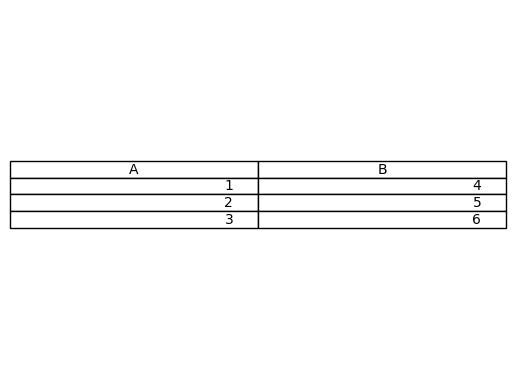

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

# Create a figure and axes
fig, ax = plt.subplots()

# Hide axes
ax.axis('off')

# Create table
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center')

# Adjust layout
table.auto_set_font_size(False)
table.set_fontsize(10)

# Show the plot
plt.show()

### Create Sample Data Folder

In [1]:
import os
import shutil
import json

import pandas as pd
import numpy as np

In [2]:
### eng2tel

with open("data\eng2tel\english_telugu_data.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()

with open("sample_data\eng2tel\english_telugu_data.txt", "w", encoding="utf-8") as wf:
    wf.writelines(lines[:1000])

In [ ]:
with open("data\eng2tel\english_telugu_data.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()

with open("sample_data\eng2tel\english_telugu_data.txt", "w", encoding="utf-8") as wf:
    wf.writelines(lines[:1000])

In [25]:
### flickr_8k

with open(r"data\flickr_8k\captions.txt", "r") as f:
    lines = f.readlines()

rand_ids = np.random.choice(np.arange(len(lines)-1)+1, 96, replace=False)
new_lines = [lines[0]]

for id_ in rand_ids:
    line = lines[id_]
    new_lines.append(line)
    im_name = line.split(",")[0]
    src = os.path.join(r"data\flickr_8k\Images", im_name)
    dst = os.path.join(r"sample_data\flickr_8k\Images", im_name)
    shutil.copy(src, dst)

with open(r"sample_data\flickr_8k\captions.txt", "w") as wf:
    wf.writelines(new_lines)

In [7]:
### genius_lyrics

df = pd.read_csv(r"data\genius_lyrics\english_lyrics.csv")
rand_ids = np.random.choice(np.arange(len(df)-1)+1, 256)
new_df = df.iloc[rand_ids]
new_df.to_csv(r"sample_data\genius_lyrics\english_lyrics.csv", index=False)

In [8]:
### wiki_en

df = pd.read_csv(r"data\wiki_en\wiki_en.csv")
rand_ids = np.random.choice(np.arange(len(df)-1)+1, 256)
new_df = df.iloc[rand_ids]
new_df.to_csv(r"sample_data\wiki_en\wiki_en.csv", index=False)

In [22]:
### squad

with open(r"data\squad\squad_v1.json") as f:
    squad_dict = json.load(f)

rand_ids = np.random.choice(len(squad_dict["data"]), 8, replace=False)

new_dict = {"version": squad_dict["version"]}
new_dict["data"] = []
for id_ in rand_ids:
    new_dict["data"].append(squad_dict["data"][id_])

with open(r"sample_data\squad\squad_v1.json", "w") as wf:
    json.dump(new_dict, wf)

### Word2Vec

In [ ]:
config_path = "./configs/word2vec.yaml"
with open(config_path, "r") as stream:
    config_dict = yaml.safe_load(stream)

cbow = Word2VecDataset(config_dict)
l_cxt, r_cxt, l_lbl, r_lbl = cbow.make_pairs()

print(cbow.vocab_freq)
print(l_cxt)
print(r_cxt)
print(l_lbl)
print(r_lbl)

train_left_loader, train_right_loader, val_left_loader, val_right_loader = create_dataloader(l_cxt, r_cxt, l_lbl, r_lbl, 0.2, 8, 2023)

# for batch in iter(train_left_loader):
#     l_c, l_l = batch
#     print(l_c)
#     print(l_l)
#     break

# for batch in iter(train_right_loader):
#     r_c, r_l = batch
#     print(r_c)
#     print(r_l)
#     break

In [65]:
model = CBOW(config_dict)

train_loader = (train_left_loader, train_right_loader)
val_loader = (val_left_loader, val_right_loader)
optim = torch.optim.Adam(model.parameters(), lr=config_dict["train"]["lr"])
history = fit_model(model, optim, train_loader, val_loader, config_dict)

-----------Epoch 1/10-----------


Validation: 100%|██████████| 51/51 [00:19<00:00,  2.56it/s]


Train Loss : 5.19072961807251 - Val Loss : 2.880483865737915
Validation Loss improved from inf to 2.880483865737915
-----------Epoch 2/10-----------


Validation: 100%|██████████| 51/51 [00:17<00:00,  3.00it/s]


Train Loss : 2.8874399662017822 - Val Loss : 2.194394826889038
Validation Loss improved from 2.880483865737915 to 2.194394826889038
-----------Epoch 3/10-----------


Validation: 100%|██████████| 51/51 [00:17<00:00,  2.95it/s]


Train Loss : 2.2812020778656006 - Val Loss : 1.9462478160858154
Validation Loss improved from 2.194394826889038 to 1.9462478160858154
-----------Epoch 4/10-----------


Validation: 100%|██████████| 51/51 [00:16<00:00,  3.05it/s]


Train Loss : 1.9103882312774658 - Val Loss : 1.7780832052230835
Validation Loss improved from 1.9462478160858154 to 1.7780832052230835
-----------Epoch 5/10-----------


Validation: 100%|██████████| 51/51 [00:15<00:00,  3.28it/s]


Train Loss : 1.6663691997528076 - Val Loss : 1.6299480199813843
Validation Loss improved from 1.7780832052230835 to 1.6299480199813843
-----------Epoch 6/10-----------


Validation: 100%|██████████| 51/51 [00:14<00:00,  3.46it/s]


Train Loss : 1.4816888570785522 - Val Loss : 1.539669156074524
Validation Loss improved from 1.6299480199813843 to 1.539669156074524
-----------Epoch 7/10-----------


Validation: 100%|██████████| 51/51 [00:14<00:00,  3.44it/s]


Train Loss : 1.3658875226974487 - Val Loss : 1.4765939712524414
Validation Loss improved from 1.539669156074524 to 1.4765939712524414
-----------Epoch 8/10-----------


Validation: 100%|██████████| 51/51 [00:14<00:00,  3.60it/s]


Train Loss : 1.2907533645629883 - Val Loss : 1.4481770992279053
Validation Loss improved from 1.4765939712524414 to 1.4481770992279053
-----------Epoch 9/10-----------


Validation: 100%|██████████| 51/51 [00:14<00:00,  3.52it/s]


Train Loss : 1.2339324951171875 - Val Loss : 1.4516034126281738
Validation loss didn't improve from 1.4481770992279053
-----------Epoch 10/10-----------


Validation: 100%|██████████| 51/51 [00:14<00:00,  3.47it/s]


Train Loss : 1.1893771886825562 - Val Loss : 1.4282432794570923
Validation Loss improved from 1.4481770992279053 to 1.4282432794570923
Training completed in 0h 5m 55s
Best Val RMSE: 1.4282432794570923


In [84]:
from sklearn.manifold import TSNE
import plotly.express as px

model.load_state_dict(torch.load("./output/word2vec/best_model.pt", weights_only=True))

embeds = model.cxt_embedding.weight.detach().numpy()
vocab = list(cbow.vocab_freq.keys())

tsne = TSNE(n_components=3)
embeds_tsne = tsne.fit_transform(embeds)

tsne_df = pd.DataFrame.from_dict({
    "X": embeds_tsne[:, 0],
    "Y": embeds_tsne[:, 1],
    "Z": embeds_tsne[:, 2], 
    "Word": vocab
})
px.scatter_3d(tsne_df, x="X", y="Y", z="Z", text="Word")

e:\anaconda\envs\nlp_env\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "e:\anaconda\envs\nlp_env\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "e:\anaconda\envs\nlp_env\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "e:\anaconda\envs\nlp_env\lib\subprocess.py", line 947, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "e:\anaconda\envs\nlp_env\lib\subprocess.py", line 1416, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


In [ ]:
vocab_dict = {0: 4, 1: 6, 2: 3, 3: 2, 4: 2}

tree = HuffmanBTree(vocab_dict)
print(tree.word_code)
print(tree.word_path)
print(tree.left_dict)
print(tree.right_dict)

# {1: [1, 1], 0: [1, 0], 3: [0, 1, 1], 4: [0, 1, 0], 2: [0, 0]}
# {1: [8, 7], 0: [8, 7], 3: [8, 6, 5], 4: [8, 6, 5], 2: [8, 6]}
# ([[8], [8, 7], [], [6, 5], [6]], [[7], [], [8, 6], [8], [8, 5]])

In [ ]:
freq_df = pd.read_csv("./output/bow/Vocab Frequency.csv")
freq_df.sort_values(by="Frequency", ascending=False, ignore_index=True, inplace=True)
freq_df = freq_df.iloc[:1000]
num_vocab = 5
freq_df = freq_df.iloc[np.random.choice(len(freq_df), num_vocab)]

vocab = list(freq_df["Word"])
freq = list(freq_df["Frequency"])
vocab_idx = [i for i in range(len(vocab))]
vocab_dict = {k:v for k,v in zip(vocab_idx, freq)}

freq_df.head(num_vocab)

In [104]:
class Word:
    def __init__(self, word, freq):
        self.word = word
        self.freq = freq

class Tree:
    def __init__(self, word, freq, left, right):
        self.word = word
        self.freq = freq
        self.right = right
        self.left = left

def construct_tree(vocab, freq):
    word_list = []
    for w,f in zip(vocab, freq):
        word_list.append(Word(w,f))

    count = 0
    while len(word_list) > 1:
        left = word_list[-1]
        right = word_list[-2]

        word = f"W{count}"
        freq = left.freq + right.freq

        print(f"Root: ({word}, {freq}), Left: ({left.word}, {left.freq}), Right: ({right.word}, {right.freq})")

        tree = Tree(word, freq, left, right)
        word_list = word_list[:-2]
        
        word_list.append(tree)
        word_list = sorted(word_list, key=lambda a:a.freq, reverse=False)

        count += 1

    return tree

def encode_tree(tree, path_dict, path):

    if isinstance(tree, Word):
        path_dict[tree.word] = path
    
    if isinstance(tree.left, Word):
        path_dict[tree.left.word] = path + [0]
    else:
        encode_tree(tree.left, path_dict, path+[0])

    if isinstance(tree.right, Word):
        path_dict[tree.right.word] = path + [1]
    else:
        encode_tree(tree.right, path_dict, path+[1])

    if len(path_dict) == num_vocab:
        return path_dict

In [ ]:
tree = construct_tree(vocab, freq)

path_dict = {}
path = []
path_dict = encode_tree(tree, path_dict, path)
path_dict

### GloVe

In [1]:
import numpy as np
import yaml
import os
import sys
sys.path.append("./src/")
from src.core.word2vec.dataset import Word2VecDataset

from collections import defaultdict
import tqdm
import time

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

from sklearn.model_selection import train_test_split

In [2]:
config_path = "./configs/glove.yaml"
with open(config_path, "r") as stream:
    config_dict = yaml.safe_load(stream)

cbow_ds = Word2VecDataset(config_dict)

text_ls = cbow_ds.text_ls
word2id = cbow_ds.word2id
id2word = cbow_ds.id2word
num_vocab = len(word2id)
context = config_dict["dataset"]["context"]

val_split = config_dict["dataset"]["val_split"]
batch_size = config_dict["dataset"]["batch_size"]
seed = config_dict["dataset"]["batch_size"]

xmax = config_dict["train"]["x_max"]
alpha = config_dict["train"]["alpha"]

Extracting from: unsup: 100%|██████████| 5/5 [00:00<00:00, 107.52it/s]


Validation: 100%|██████████| 31/31 [00:03<00:00,  8.71it/s]
e:\anaconda\envs\nlp_env\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "e:\anaconda\envs\nlp_env\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "e:\anaconda\envs\nlp_env\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "e:\anaconda\envs\nlp_env\lib\subprocess.py", line 947, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "e:\anaconda\envs\nlp_env\lib\subprocess.py", line 1416, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(exec

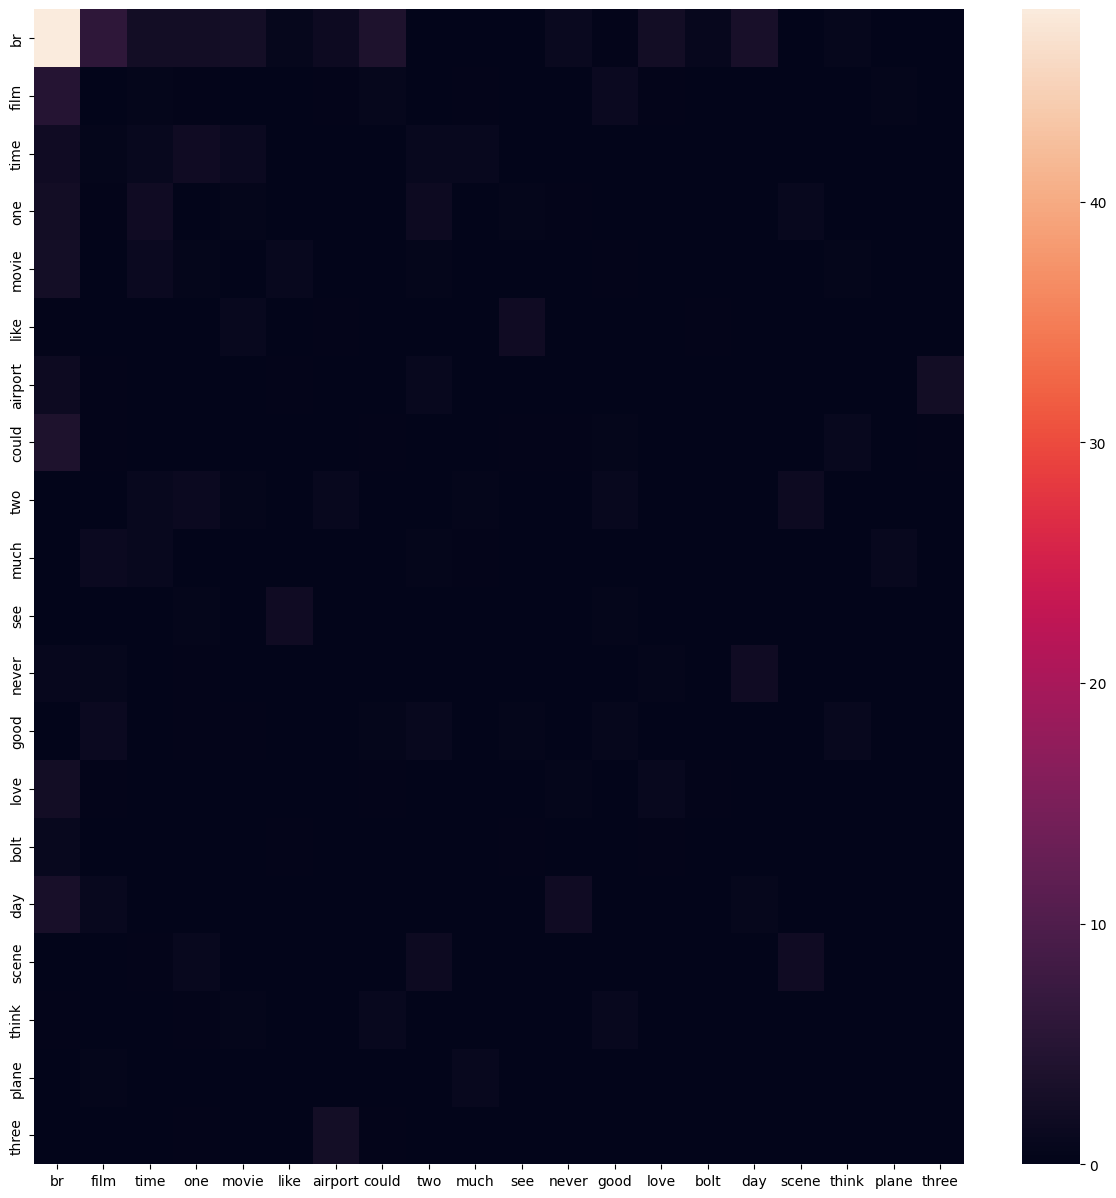

In [3]:
from core.glove.glove import GloVe

glove_model = GloVe(config_dict)
glove_model.run()

In [9]:
glove_model.glove_ds.word2id.keys()

dict_keys(['br', 'film', 'time', 'one', 'movie', 'like', 'airport', 'could', 'two', 'much', 'see', 'never', 'good', 'love', 'bolt', 'day', 'scene', 'think', 'plane', 'three', 'little', 'scenes', 'cagney', 'great', 'seen', 'plot', 'many', 'acting', 'oscar', 'people', 'brooks', 'even', 'make', 'future', '77', 'air', 'help', 'films', 'made', 'well', 'high', 'chasers', 'etting', 'story', 'man', 'audience', 'making', 'dialogue', 'would', 'better', 'stars', 'rich', 'james', 'also', 'right', 'disaster', 'say', 'far', 'best', 'maybe', 'either', 'something', 'look', 'cut', 'looks', 'leading', 'actors', 'watch', 'take', 'movies', 'life', 'without', 'allen', 'characters', 'bromwell', 'teachers', 'years', 'lead', 'homeless', 'streets', 'bet', 'mel', 'warren', 'opening', 'comedy', 'new', '747', 'valuable', 'takes', 'different', 'second', 'classic', 'although', 'actually', 'liked', 'character', 'dull', 'minutes', 'george', 'back', '<UNK>'])

In [13]:
from preprocess.utils import preprocess_text

operations = config_dict["preprocess"]["operations"]
sentence = preprocess_text(text_ls[0], operations)
word_ls = sentence.split()
vocab = glove_model.glove_ds.word2id.keys()
word_ls = [i if i in vocab else "<UNK>" for i in word_ls]
word_ids = [glove_model.glove_ds.word2id[word] for word in word_ls]
word_ids = torch.Tensor(word_ids).to(torch.long)
word_embeds = glove_model.model.ctr_embedding(word_ids)
word_embeds.shape

torch.Size([63, 128])

In [28]:
cooccur_mat = np.zeros((num_vocab, num_vocab))

for text in text_ls:
    words = text.split()

    if len(words) < 1 + context:
        continue

    for i in range(context, len(words)-context):
        id_i = word2id[words[i]]
        for j in range(i-context, i+context):
            id_j = word2id[words[j]]
            dist = np.abs(j-i)
            if dist != 0: cooccur_mat[id_i][id_j] += 1/dist

X_ctr, X_cxt = np.indices((num_vocab, num_vocab))
X_ctr, X_cxt = X_ctr.flatten(), X_cxt.flatten()
X_count = cooccur_mat.flatten()
# fig, ax = plt.subplots(1, 1, figsize=(15,15))
# sns.heatmap(cooccur_mat, xticklabels=word2id.keys(), yticklabels=word2id.keys(), ax=ax)

In [ ]:
# glove_model = GloVeModel(config_dict)
# optim = torch.optim.Adam(glove_model.parameters(), lr=config_dict["train"]["lr"])

# glove_trainer = GloVeTrainer(glove_model, optim, config_dict)
# glove_trainer.fit(train_loader, val_loader)

### RNN

In [63]:
import numpy as np
import yaml
import os
import sys
sys.path.append("./src/")
from preprocess.imdb_reviews import PreprocessIMDB
from src.core.word2vec.dataset import Word2VecDataset

from collections import defaultdict
import tqdm
import time

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [64]:
### Dataset
config_path = "./configs/rnn.yaml"
with open(config_path, "r") as stream:
    config_dict = yaml.safe_load(stream)

cbow_ds = Word2VecDataset(config_dict)

text_ls = cbow_ds.text_ls
label_ls = np.array(cbow_ds.preproc_cls.label_ls)
le = OneHotEncoder()
label_ls = le.fit_transform(label_ls.reshape(-1, 1)).toarray()
word2id = cbow_ds.word2id
id2word = cbow_ds.id2word

word2id["<PAD>"] = len(word2id)
id2word[len(id2word)] = "<PAD>"

num_vocab = len(word2id)

print(np.unique(label_ls, return_counts=True))

seq_len = config_dict["dataset"]["seq_len"]
print(num_vocab, seq_len)

text_id_ls = []
for text in text_ls:
    ls = []
    for word in text.split()[:seq_len]:
        ls.append(word2id[word])
    if len(ls) < seq_len:
        num_pad = seq_len - len(ls)
        ls.extend([word2id["<PAD>"]]*num_pad)
    text_id_ls.append(ls)

text_id_ls, label_ls = np.array(text_id_ls), np.array(label_ls)

Extracting from: pos: 100%|██████████| 64/64 [00:00<00:00, 238.62it/s]


(array([0., 1.]), array([128, 128]))
102 100


In [38]:
### Data Loader

val_split = config_dict["dataset"]["val_split"]
batch_size = config_dict["dataset"]["batch_size"]
seed = config_dict["dataset"]["batch_size"]

def create_dataloader(X, y, val_split, batch_size, seed):
    train_x, val_x, train_y, val_y = train_test_split(X, y, test_size=val_split, random_state=seed)

    train_ds = TensorDataset(torch.Tensor(train_x), torch.Tensor(train_y))
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, drop_last=True, num_workers=1, pin_memory=True)

    val_ds = TensorDataset(torch.Tensor(val_x), torch.Tensor(val_y))
    val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False, drop_last=True, num_workers=1, pin_memory=True)
    return train_loader, val_loader

train_loader, val_loader = create_dataloader(text_id_ls, label_ls, val_split, batch_size, seed)

X, y = next(iter(train_loader))
print(X.shape)
print(y.shape)

torch.Size([8, 100])
torch.Size([8, 2])


In [55]:
### RNN Cell

class RNNCell(nn.Module):
    def __init__(self, h_dim, inp_x_dim, out_x_dim):
        super(RNNCell, self).__init__()
        
        self.hh_dense = nn.Linear(h_dim, h_dim)
        self.hx_dense = nn.Linear(inp_x_dim, h_dim)

        self.xh_dense = nn.Linear(h_dim, out_x_dim)

    def forward(self, ht_1, xt):
        ht = nn.Tanh()(self.hh_dense(ht_1) + self.hx_dense(xt))
        yt = self.xh_dense(ht)
        return ht, yt

class RNNModel(nn.Module):
    def __init__(self, config_dict):
        super(RNNModel, self).__init__()

        self.seq_len = config_dict["dataset"]["seq_len"]
        self.num_layers = config_dict["model"]["num_layers"]
        self.h_dims = config_dict["model"]["h_dim"]
        self.x_dims = config_dict["model"]["x_dim"]
        self.clf_dims = config_dict["model"]["clf_dim"]
        self.num_classes = config_dict["dataset"]["num_classes"]

        num_vocab = 2 + config_dict["dataset"]["num_vocab"]
        embed_dim = config_dict["model"]["embed_dim"]
        self.embed_layer = nn.Embedding(num_vocab, embed_dim)

        self.rnn_cells = []
        for i in range(self.num_layers):
            h_dim = self.h_dims[i]
            inp_x_dim, out_x_dim = self.x_dims[i], self.x_dims[i+1]
            self.rnn_cells.append(RNNCell(h_dim, inp_x_dim, out_x_dim))

    def forward(self, X):
        x_embed = self.embed_layer(X.to(torch.long))
        self.num_samples = x_embed.size(0)
        
        yt_1s = x_embed
        hts = self.init_hidden()
        for i in range(self.num_layers):
            yts = []
            rnn_cell = self.rnn_cells[i]

            ht = hts[i]
            for j in range(self.seq_len):
                ht, yt = rnn_cell(ht, yt_1s[:, j, :])
                yts.append(yt)

            yt_1s = torch.transpose(torch.stack(yts), 0, 1)

        out = yt_1s[:, -1, :]
        for i in range(len(self.clf_dims)-1):
            out = nn.Linear(self.clf_dims[i], self.clf_dims[i+1])(out)
            out = nn.ReLU()(out)

        out = nn.Linear(self.clf_dims[-1], self.num_classes)(out)

        return out

    def init_hidden(self):
        hts = [nn.init.kaiming_uniform(torch.empty(self.num_samples, dim)) for dim in self.h_dims]

        return hts

In [40]:
rnn_model = RNNModel(config_dict)
out = rnn_model(X)
out.shape

torch.Size([8, 2])

In [57]:
loss_fn = nn.CrossEntropyLoss(reduction="sum")

def train_one_epoch(model, optimizer, data_loader, epoch):
    model.train()
    total_loss, num_instances = 0, 0
    y_true, y_pred = [], []

    print(f"-----------Epoch {epoch}/{config_dict['train']['epochs']}-----------")
    pbar = tqdm.tqdm(enumerate(data_loader), total=len(data_loader), desc="Training")

    for batch_id, (X, y) in pbar:
        y_hat = model(X)

        loss = loss_fn(y, y_hat)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        total_loss += loss
        num_instances += y.size(0)

        y_true.append(y.cpu().detach().numpy().argmax(axis=1))
        y_pred.append(y_hat.cpu().detach().numpy().argmax(axis=1))

    train_loss = total_loss/num_instances

    y_true = np.concatenate(y_true, axis=0)
    y_pred = np.concatenate(y_pred, axis=0)
    train_acc = accuracy_score(y_true, y_pred)

    return train_loss, train_acc
        
@torch.no_grad()
def val_one_epoch(model, data_loader):
    model.eval()
    total_loss, num_instances = 0, 0
    y_true, y_pred = [], []

    pbar = tqdm.tqdm(enumerate(data_loader), total=len(data_loader), desc="Validation")

    for batch_id, (X, y) in pbar:
        y_hat = model(X)

        loss = loss_fn(y, y_hat)

        total_loss += loss
        num_instances += y.size(0)

        y_true.append(y.cpu().detach().numpy().argmax(axis=1))
        y_pred.append(y_hat.cpu().detach().numpy().argmax(axis=1))

    val_loss = total_loss/num_instances
    
    y_true = np.concatenate(y_true, axis=0)
    y_pred = np.concatenate(y_pred, axis=0)
    val_acc = accuracy_score(y_true, y_pred)

    return val_loss, val_acc

def fit_model(model, optimizer, train_loader, val_loader):
    num_epochs = config_dict["train"]["epochs"]
    output_folder = config_dict["paths"]["output_folder"]

    best_val_acc = -np.inf
    history = defaultdict(list)

    start = time.time()
    for epoch in range(1, num_epochs+1):
        train_loss, train_acc = train_one_epoch(model, optimizer, train_loader, epoch)
        val_loss, val_acc = val_one_epoch(model, val_loader)

        print(f"Train Loss : {train_loss} - Train Acc: {train_acc} - Val Loss : {val_loss} - Val Acc: {val_acc}")
            
        history["train_loss"].append(float(train_loss.detach().numpy()))
        history["val_loss"].append(float(val_loss.detach().numpy()))
        history["train_acc"].append(train_acc)
        history["val_acc"].append(val_acc)

        if val_acc >= best_val_acc:
            print(f"Validation Accuracy improved from {best_val_acc} to {val_acc}")
            best_val_acc = val_acc
            torch.save(model.state_dict(), os.path.join(output_folder, "best_model.pt"))
        else:
            print(f"Validation Accuracy didn't improve from {best_val_acc}")

    end = time.time()
    time_taken = end-start
    print('Training completed in {:.0f}h {:.0f}m {:.0f}s'.format(
        time_taken // 3600, (time_taken % 3600) // 60, (time_taken % 3600) % 60))
    print(f"Best Val Accuracy: {best_val_acc}")

    return history

In [58]:
optimizer = torch.optim.Adam(rnn_model.parameters(), lr=1e-3)
history = fit_model(rnn_model, optimizer, train_loader, val_loader)

-----------Epoch 1/10-----------


Validation: 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]


Train Loss : 0.007845318876206875 - Train Acc: 0.5208333333333334 - Val Loss : 0.09338304400444031 - Val Acc: 0.5
Validation Accuracy improved from -inf to 0.5
-----------Epoch 2/10-----------


Validation: 100%|██████████| 1/1 [00:03<00:00,  3.35s/it]


Train Loss : 0.06674794107675552 - Train Acc: 0.5833333333333334 - Val Loss : -0.10954995453357697 - Val Acc: 0.5
Validation Accuracy improved from 0.5 to 0.5
-----------Epoch 3/10-----------


Validation: 100%|██████████| 1/1 [00:03<00:00,  3.42s/it]


Train Loss : 0.0038952704053372145 - Train Acc: 0.5208333333333334 - Val Loss : -0.20257733762264252 - Val Acc: 0.5
Validation Accuracy improved from 0.5 to 0.5
-----------Epoch 4/10-----------


Validation: 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]


Train Loss : -0.033416640013456345 - Train Acc: 0.5833333333333334 - Val Loss : 0.3872898519039154 - Val Acc: 0.5
Validation Accuracy improved from 0.5 to 0.5
-----------Epoch 5/10-----------


Validation: 100%|██████████| 1/1 [00:04<00:00,  4.52s/it]


Train Loss : 0.15104039013385773 - Train Acc: 0.5208333333333334 - Val Loss : -0.4174274802207947 - Val Acc: 0.5
Validation Accuracy improved from 0.5 to 0.5
-----------Epoch 6/10-----------


Validation: 100%|██████████| 1/1 [00:07<00:00,  7.09s/it]


Train Loss : 0.1364857703447342 - Train Acc: 0.4375 - Val Loss : 0.27591562271118164 - Val Acc: 0.5
Validation Accuracy improved from 0.5 to 0.5
-----------Epoch 7/10-----------


Validation: 100%|██████████| 1/1 [00:06<00:00,  6.90s/it]


Train Loss : 0.025014957413077354 - Train Acc: 0.4583333333333333 - Val Loss : -0.24408555030822754 - Val Acc: 0.5
Validation Accuracy improved from 0.5 to 0.5
-----------Epoch 8/10-----------


Validation: 100%|██████████| 1/1 [00:08<00:00,  8.43s/it]


Train Loss : -0.03482829034328461 - Train Acc: 0.5208333333333334 - Val Loss : 0.36403200030326843 - Val Acc: 0.5
Validation Accuracy improved from 0.5 to 0.5
-----------Epoch 9/10-----------


Validation: 100%|██████████| 1/1 [00:07<00:00,  7.64s/it]


Train Loss : 0.15296544134616852 - Train Acc: 0.5416666666666666 - Val Loss : 0.08933401107788086 - Val Acc: 0.5
Validation Accuracy improved from 0.5 to 0.5
-----------Epoch 10/10-----------


Validation: 100%|██████████| 1/1 [00:07<00:00,  7.85s/it]

Train Loss : -0.006540011614561081 - Train Acc: 0.625 - Val Loss : -0.18438105285167694 - Val Acc: 0.5
Validation Accuracy improved from 0.5 to 0.5
Training completed in 0h 2m 6s
Best Val Accuracy: 0.5


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
fig = disp.plot()
fig.figure_

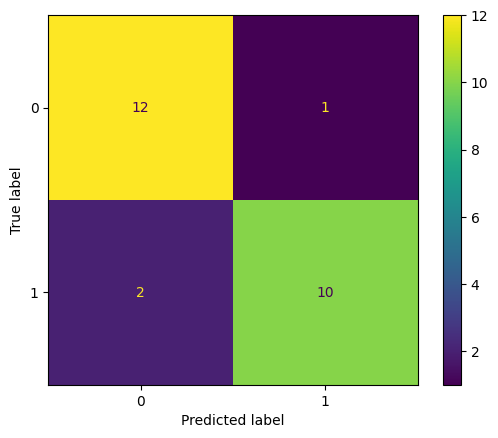

In [78]:
disp = ConfusionMatrixDisplay.from_predictions(y_test, predictions, labels=clf.classes_)

### LSTM

In [117]:
import os
import yaml
import itertools
import numpy as np
import pandas as pd
from collections import Counter

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.cuda import amp
import torch.optim as optim
from torch.optim import lr_scheduler as LR
import timm

import albumentations as A
from albumentations.pytorch import ToTensorV2

import sys
sys.path.append("./src/")
from preprocess.utils import preprocess_text

In [ ]:
config_path = "./configs/lstm.yaml"
with open(config_path, "r") as stream:
    config_dict = yaml.safe_load(stream)

#############
### flickr.py
#############

### extract_data()
im_folder = config_dict["paths"]["image_folder"]
cap_file = config_dict["paths"]["captions_file"]
operations = config_dict["preprocess"]["operations"]

with open(cap_file, "r") as f:
    lines = np.array(f.readlines()[1:])

num_train = config_dict["dataset"]["train_samples"]
num_test = config_dict["dataset"]["test_samples"]
rand_ids = np.random.choice(len(df), num_train+num_test)

paths, captions = zip(*(s.split(",") for s in lines[rand_ids]))
paths = [os.path.join(im_folder, i) for i in paths]
df = pd.DataFrame.from_dict({
    "Path": paths,
    "Caption": captions
})
df["Caption"] = df["Caption"].map(lambda x: preprocess_text(x, operations))

train_df = df.iloc[rand_ids[:num_train]]
test_df = df.iloc[num_train:]

df.head(2)

In [64]:
### get_vocab()
#uniq_words = list(set(itertools.chain.from_iterable(map(str.split, train_df["Caption"]))))
num_vocab = config_dict["dataset"]["num_vocab"]
all_words = []

for text in train_df["Caption"]:
    all_words += text.split()

topk_vocab_freq = Counter(all_words).most_common(num_vocab-4)
vocab = ["<START>", "<END>", "<PAD>", "<UNK>"] + [i[0] for i in topk_vocab_freq]
word2id = {w:i for i,w in enumerate(vocab)}
id2word = {v:k for k,v in word2id.items()}

### word_to_tokens()
seq_len = config_dict["dataset"]["seq_len"]

tmp_df = test_df
tokens = np.zeros((len(tmp_df), seq_len))

for i, text in enumerate(tmp_df["Caption"]):
    words = ["<START>"] + text.split()[:seq_len] 
    if len(words) < seq_len - 1:
        words += ["<PAD>"]*(seq_len-1-len(words))
    words += ["<END>"]

    for j, w in enumerate(words):
        if w in vocab:
            tokens[i, j] = word2id[w]   
        else:
            tokens[i, j] = word2id["<UNK>"]   

### image_transforms()  
im_w, im_h = config_dict["preprocess"]["image_dim"]
train_transforms = A.Compose([
                            A.Resize(im_w, im_h),
                            A.HorizontalFlip(p=0.5),
                            A.RandomBrightnessContrast(p=0.2),
                            A.Normalize(
                                    mean=[0.485, 0.456, 0.406], 
                                    std=[0.229, 0.224, 0.225], 
                                    max_pixel_value=255.0, 
                                    p=1.0 
                                ),
                            ToTensorV2()], p=1.0)

test_transforms = A.Compose([
                            A.Resize(im_w, im_h),
                            A.Normalize(
                                    mean=[0.485, 0.456, 0.406], 
                                    std=[0.229, 0.224, 0.225], 
                                    max_pixel_value=255.0, 
                                    p=1.0 
                                ),
                            ToTensorV2()], p=1.0)

### get_data()
# returns (train_paths, train_tokens), (test_paths, test_tokens), (train_transforms, test_transforms)


### def create_dataloader(train_data, test_data, transforms)

In [136]:
### LSTM Cell
import torch.nn as nn
import timm

class LSTMCell(nn.Module):
    def __init__(self, h_dim, inp_x_dim, out_x_dim):
        super(LSTMCell, self).__init__()

        self.wf_dense = nn.Linear(h_dim, h_dim)
        self.uf_dense = nn.Linear(inp_x_dim, h_dim)

        self.wi_dense = nn.Linear(h_dim, h_dim)
        self.ui_dense = nn.Linear(inp_x_dim, h_dim)

        self.wo_dense = nn.Linear(h_dim, h_dim)
        self.uo_dense = nn.Linear(inp_x_dim, h_dim)

        self.wc_dense = nn.Linear(h_dim, h_dim)
        self.uc_dense = nn.Linear(inp_x_dim, h_dim)

        self.xh_dense = nn.Linear(h_dim, out_x_dim)

    def forward(self, ht_1, ct_1, xt):
        ft = nn.Sigmoid()(self.wf_dense(ht_1) + self.uf_dense(xt))
        it = nn.Sigmoid()(self.wi_dense(ht_1) + self.ui_dense(xt))
        ot = nn.Sigmoid()(self.wo_dense(ht_1) + self.uo_dense(xt))

        ct_ = nn.Tanh()(self.wc_dense(ht_1) + self.uc_dense(xt))
        ct = ft*ct_1 + it*ct_
        ht = ot*nn.Tanh()(ct)

        yt = self.xh_dense(ht)

        return ht, ct, yt


### LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, config_dict):
        super(LSTMModel, self).__init__()

        self.seq_len = config_dict["dataset"]["seq_len"]
        self.num_layers = config_dict["model"]["num_layers"]
        self.h_dims = config_dict["model"]["h_dim"]
        self.x_dims = config_dict["model"]["x_dim"]
        image_dim = config_dict["preprocess"]["image_dim"]

        num_vocab = config_dict["dataset"]["num_vocab"]
        embed_dim = config_dict["model"]["embed_dim"]
        self.embed_layer = nn.Embedding(num_vocab, embed_dim)
        
        image_backbone = config_dict["model"]["image_backbone"]
        self.im_head = timm.create_model(image_backbone, pretrained=True, num_classes=0)
        im_feat_dim = self.im_head(torch.rand(tuple([1] + image_dim))).data.shape[-1]
        self.im_dense = nn.Linear(im_feat_dim, embed_dim)

        self.word_classifier = nn.Linear(self.x_dims[-1], num_vocab)

        self.lstm_cells = []
        for i in range(self.num_layers):
            h_dim = self.h_dims[i]
            inp_x_dim, out_x_dim = self.x_dims[i], self.x_dims[i+1]
            self.lstm_cells.append(LSTMCell(h_dim, inp_x_dim, out_x_dim))

    def forward(self, images, tokens=None):
        self.num_samples = images.size(0)

        hts = self.init_hidden()
        cts = self.init_hidden()

        im_feat = self.im_head(images)
        yt = self.im_dense(im_feat)

        for i in range(self.num_layers):
            ht, ct = hts[i], cts[i]
            ht, ct, yt = self.lstm_cells[i](ht, ct, yt)
            hts[i], cts[i] = ht, ct

        if tokens is not None:
            x_embed = self.embed_layer(tokens.to(torch.long))
            yt = x_embed[:, 0, :]
        else:
            start_token = torch.zeros(1, 1).to(torch.long)
            yt = self.embed_layer(start_token)[:, 0, :]

        pts = []
        for j in range(self.seq_len):
            for i in range(self.num_layers):
                ht, ct = hts[i], cts[i]
                ht, ct, yt = self.lstm_cells[i](ht, ct, yt)
                hts[i], cts[i] = ht, ct
                
            yt = self.word_classifier(yt)
            pt = nn.Softmax()(yt)[:, None, :]
            pts.append(pt)
            
            if j >=  self.seq_len - 1:
                break
            if tokens is not None:
                yt = x_embed[:, j+1, :]
            else:
                yt = yt.argmax(axis=1)
                yt = self.embed_layer(yt.to(torch.long))

        return torch.concat(pts, dim=1)


    def init_hidden(self):
        hts = [nn.init.kaiming_uniform_(torch.empty(self.num_samples, dim)) for dim in self.h_dims]

        return hts

In [1]:
import yaml
import sys
sys.path.append("./src/")
from src.core.lstm import lstm

config_path = "./configs/lstm.yaml"
with open(config_path, "r") as stream:
    config_dict = yaml.safe_load(stream)

algo = lstm.LSTM(config_dict)
algo.run()

e:\anaconda\envs\nlp_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Training:   0%|          | 0/6 [00:00<?, ?it/s]e:\anaconda\envs\nlp_env\lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
e:\anaconda\envs\nlp_env\lib\site-packages\torch\nn\_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
Validation: 100%|██████████| 1/1 [00:05<00:00,  5.49s/it]


In [8]:
history = algo.history

history["train_Perplexity"][0].item()

41.210533142089844

In [17]:
test_captions, test_pred_captions = algo.run_infer()

for true, pred in zip(test_captions, test_pred_captions):
    print(true, pred)

test_tokens, test_pred_tokens = algo.run_infer()
test_pred_tokens = test_pred_tokens.argmax(axis=-1).astype("int")
test_tokens = test_tokens.astype("int")

Inference:   0%|          | 0/2 [00:00<?, ?it/s]e:\anaconda\envs\nlp_env\lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
Inference: 100%|██████████| 2/2 [00:37<00:00, 18.73s/it]


In [21]:
import numpy as np

func = lambda x: algo.flickr_ds.id2word[x]
vect_func = np.vectorize(func)

test_words = vect_func(test_tokens)
test_pred_words = vect_func(test_pred_tokens)

test_captions = []
for words in test_words:
    txt = ""
    for word in words:
        if word not in  ["<START>", "<END>", "<PAD>"]:
            txt += f"{word} "
    test_captions.append(txt)



['two <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> ',
 '<UNK> <UNK> dog carrying <UNK> mouth <UNK> ',
 'black <UNK> dog <UNK> <UNK> course ',
 '<UNK> <UNK> wearing green <UNK> ',
 'black dog <UNK> <UNK> <UNK> <UNK> <UNK> fence ',
 'young man <UNK> <UNK> mouth wearing black jacket ',
 '<UNK> dog <UNK> <UNK> <UNK> <UNK> ',
 'two <UNK> <UNK> <UNK> <UNK> case ']

In [ ]:
images, tokens = next(iter(train_loader))

model = LSTMModel(config_dict)
out = model(images)
print(out.shape, tokens.shape)

In [114]:
import torch.nn.functional as F

flat_out = torch.flatten(out, end_dim=1)
flat_tokens = torch.flatten(tokens)
flat_tokens = F.one_hot(flat_tokens.to(torch.long), num_classes=config_dict["dataset"]["num_vocab"])

loss_fn = nn.CrossEntropyLoss(reduce="sum")
loss_fn(flat_out, flat_tokens.to(torch.float))

In [41]:
inp = torch.ones((32, 100))
inp = inp[:, None, :]
inp.shape

torch.Size([32, 1, 100])

In [ ]:
import timm
import torch

im_model = timm.create_model("mobilenetv3_small_050", pretrained=True, num_classes=0)
inp = torch.randn((1, 3, 64, 64))
im_model(inp).data.shape[-1]

In [ ]:
for layer in im_model.children():
    if hasattr(layer, "out_features"):
        print(layer.out_features)

In [33]:
### METEOR

import numpy as np

refs = np.array([0, 1, 2, 3, 0, 4])#, 7]
preds = np.array([3, 0, 4, 2, 0, 1])#, 6, 8]

m = 0
mask = np.ones(preds.shape)
match_ids = -1*np.ones(refs.shape).astype("int")
for i, w_r in enumerate(refs):
    for j, w_p in enumerate(preds):
        if w_r == w_p and mask[j]:
            m += 1
            mask[j] = 0
            match_ids[i] = j
            break

print(m)
print(match_ids)

6
[1 5 3 0 4 2]


In [3]:
### ROUGE-N

import numpy as np

refs = np.array([0, 1, 2, 3, 0, 4, 7])
preds = np.array([3, 0, 4, 2, 0, 1, 6, 8, 1, 1])
n = 1

refs_n = [" ".join([str(refs[j+k]) for k in range(n)]) for j in range(len(refs)-n+1)]
preds_n = [" ".join([str(preds[j+k]) for k in range(n)]) for j in range(len(preds)-n+1)]

n_unq_ngrams = len(set(refs_n) & set(preds_n))
precision = n_unq_ngrams/len(preds_n)
recall = n_unq_ngrams/len(refs_n)
fscore = 2*precision*recall/(precision + recall)

print(precision, recall, fscore)

0.5 0.7142857142857143 0.588235294117647


In [9]:
from collections import Counter

ref_cnt_dict = Counter(refs)
pred_cnt_dict = Counter(refs)

sum = 0
for k in pred_cnt_dict.keys():
    cnt_k = min(pred_cnt_dict[k], ref_cnt_dict.get(k, 0))
    print(k, cnt_k)
    sum += cnt_k

0 2
1 1
2 1
3 1
4 1
7 1


In [49]:
### ROUGE-L

refs = np.array([0, 1, 2, 3, 0, 4, 7])
preds = np.array([3, 0, 4, 2, 3, 4, 6, 7])

m = len(refs)
n = len(preds)

lcs_mat = np.zeros((m+1, n+1))

for i in range(1, m+1):
    for j in range(1, n+1):
        if refs[i-1] == preds[j-1]:
            lcs_mat[i, j] = lcs_mat[i-1][j-1] + 1
        else:
            lcs_mat[i, j] = max(lcs_mat[i-1][j], lcs_mat[i][j-1])

float(lcs_mat[m][n])

5.0

In [70]:
### ROUGE-S

pred = np.array([0, 1, 2, 3, 4, 5, 6])
n = 4

# for i in range(len(preds)-1):
#     for k in range(i+1, min(len(preds)-1, i+n+1)):
#         print(pred[i], pred[k])

import itertools
ls = [[" ".join([str(pred[i]), str(pred[k])]) for k in range(i+1, min(len(preds)-1, i+n+1))] for i in range(len(preds)-1)]
ls = list(itertools.chain.from_iterable(ls))

[" ".join([str(pred[j]), str(pred[j+1])]) for j in range(len(pred)-1)]

['0 1', '1 2', '2 3', '3 4', '4 5', '5 6']

### GRU

In [10]:
import nltk

# nltk.download("brown")
# nltk.download("conll2000")
nltk.download("universal_tagset")

[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\shanmukh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\universal_tagset.zip.


True

In [15]:
import yaml
import sys
sys.path.append("./src/")
from preprocess.utils import preprocess_text
from sklearn.preprocessing import OneHotEncoder

from src.core.gru import gru

from nltk.corpus import brown
from nltk.corpus import treebank
from nltk.corpus import conll2000

from collections import Counter
import numpy as np

In [16]:
config_path = "./configs/gru.yaml"
with open(config_path, "r") as stream:
    config_dict = yaml.safe_load(stream)

algo = gru.GRU(config_dict)
algo.run()

Training:   0%|          | 0/12 [00:00<?, ?it/s]e:\anaconda\envs\nlp_env\lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
Validation:   0%|          | 0/3 [00:00<?, ?it/s]e:\anaconda\envs\nlp_env\lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
Training:   0%|          | 0/12 [00:00<?, ?it/s]e:\anaconda\envs\nlp_env\lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
Validation:   0%|          | 0/3 [00:00<?, ?it/s]e:\anaconda\envs\nlp_env\lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: 

In [17]:
loader = algo.run_infer()

iter_loader = iter(loader)

In [18]:
try:
    iter_loader = next(iter_loader)
    print(iter_loader[0].shape)
except:
    print("Done")

torch.Size([4, 32])


In [3]:
treebank_corpus = treebank.tagged_sents(tagset='universal')
brown_corpus = brown.tagged_sents(tagset='universal')
conll_corpus = conll2000.tagged_sents(tagset='universal')

corpus = treebank_corpus
corpus[0]

[('Pierre', 'NOUN'),
 ('Vinken', 'NOUN'),
 (',', '.'),
 ('61', 'NUM'),
 ('years', 'NOUN'),
 ('old', 'ADJ'),
 (',', '.'),
 ('will', 'VERB'),
 ('join', 'VERB'),
 ('the', 'DET'),
 ('board', 'NOUN'),
 ('as', 'ADP'),
 ('a', 'DET'),
 ('nonexecutive', 'ADJ'),
 ('director', 'NOUN'),
 ('Nov.', 'NOUN'),
 ('29', 'NUM'),
 ('.', '.')]

In [4]:
operations = config_dict["preprocess"]["operations"]
num_vocab = config_dict["dataset"]["num_vocab"]
seq_len = config_dict["dataset"]["seq_len"]

In [5]:
X = [[i[0] for i in sent] for sent in corpus]
y = [[i[1] for i in sent] for sent in corpus]

X = [preprocess_text(" ".join(sent), operations).split() for sent in X]

all_words = [word for sent in X for word in sent]
topk_vocab_freq = Counter(all_words).most_common(num_vocab-2)
vocabX = ["<PAD>", "<UNK>"] + [word[0] for word in topk_vocab_freq]
unq_pos = ["<PAD>", "<UNK>"] + list(set([word_pos for sent_pos in y for word_pos in sent_pos]))

In [10]:
word2idX = {w:i for i, w in enumerate(vocabX)}
id2wordX = {v:k for k,v in word2idX.items()}

posEnc = {w:i for i, w in enumerate(unq_pos)}
posDec = {v:k for k,v in posEnc.items()}

lencoder = OneHotEncoder()
lencoder.fit(np.arange(len(unq_pos)).reshape(-1,1))

tokenX = np.zeros((len(X), seq_len))
Y = np.zeros((len(y), seq_len, len(unq_pos)))
for i, (sent, sent_pos) in enumerate(zip(X, y)):
    labels = np.zeros((seq_len))
    sent = sent[:seq_len]
    sent_pos = sent_pos[:seq_len]
    if len(sent) < seq_len:
        sent = sent + ["<PAD>"]*(seq_len - len(sent))
        sent_pos = sent_pos + ["<PAD>"]*(seq_len - len(sent))
    for j, (word, word_pos) in enumerate(zip(sent, sent_pos)):
        bool_ = word in vocabX
        tokenX[i][j] = word2idX[word] if bool_ else word2idX["<UNK>"]
        labels[j] = posEnc[word_pos] if bool_ else posEnc["<UNK>"]
        
    Y[i] = lencoder.transform(labels.reshape(-1,1)).toarray()

In [12]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]

report = classification_report(y_true, y_pred, target_names=["A", "B", "C"], output_dict=True)
report

{'A': {'precision': 0.5,
  'recall': 1.0,
  'f1-score': 0.6666666666666666,
  'support': 1.0},
 'B': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0},
 'C': {'precision': 1.0,
  'recall': 0.6666666666666666,
  'f1-score': 0.8,
  'support': 3.0},
 'accuracy': 0.6,
 'macro avg': {'precision': 0.5,
  'recall': 0.5555555555555555,
  'f1-score': 0.48888888888888893,
  'support': 5.0},
 'weighted avg': {'precision': 0.7,
  'recall': 0.6,
  'f1-score': 0.6133333333333334,
  'support': 5.0}}

In [13]:
import numpy as np

x = np.ones((3, 4, 3))
x.reshape((-1, 2)).shape

(18, 2)

In [30]:
from sklearn.preprocessing import OneHotEncoder

le = OneHotEncoder()
a = np.array(["paris", "paris", "tokyo", "amsterdam"]).reshape(-1,1)
le.fit(a)
list(le.categories_[0])

[np.str_('amsterdam'), np.str_('paris'), np.str_('tokyo')]

### Seq2Seq

In [29]:
import yaml
import pandas as pd
import sys
sys.path.append("./src/")

from src.preprocess import eng2tel
from src.core.seq2seq import seq2seq

from collections import Counter
import numpy as np

import re
import unicodedata

In [30]:
config_path = "./configs/seq2seq.yaml"
with open(config_path, "r") as stream:
    config_dict = yaml.safe_load(stream)

# seq2seq_ds = eng2tel.PreprocessSeq2Seq(config_dict)
# X, Y = seq2seq_ds.get_data(seq2seq_ds.df)

algo = seq2seq.Seq2Seq(config_dict)
train_loader, val_loader = algo.run()

In [31]:
src, tgt = next(iter(train_loader))
print(src.shape, tgt.shape)

torch.Size([4, 16]) torch.Size([4, 16])


In [ ]:
model = Seq2SeqModel(config_dict)
lr = config_dict["train"]["lr"]
optim = torch.optim.Adam(model.parameters(), lr=lr)
trainer = Seq2SeqTrainer(model, optim, config_dict)
trainer.fit(train_loader, val_loader)

In [37]:
encoder = Seq2SeqEncoder(config_dict)
yts, ht = encoder(src)

print(yts.shape, ht.shape)

torch.Size([4, 16, 256]) torch.Size([4, 256])


In [40]:
model = Seq2SeqModel(config_dict)

probs, weights = model(src, tgt)
print(probs.shape)
for w in weights:
    print(w.shape)

torch.Size([4, 16, 256])
torch.Size([4, 1, 16])
torch.Size([4, 1, 16])
torch.Size([4, 1, 16])
torch.Size([4, 1, 16])
torch.Size([4, 1, 16])
torch.Size([4, 1, 16])
torch.Size([4, 1, 16])
torch.Size([4, 1, 16])
torch.Size([4, 1, 16])
torch.Size([4, 1, 16])
torch.Size([4, 1, 16])
torch.Size([4, 1, 16])
torch.Size([4, 1, 16])
torch.Size([4, 1, 16])
torch.Size([4, 1, 16])
torch.Size([4, 1, 16])


e:\anaconda\envs\nlp_env\lib\site-packages\torch\nn\modules\module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [34]:
x = torch.randn((4, 16, 126))
y = list(torch.transpose(x, 1, 0))
y[0].shape

torch.Size([4, 126])

In [18]:
ls = [1, 2, 3, 4, 5]

for i in range(len(ls)):
    i1, i2 = i, len(ls)-i-1
    print(ls[i1], ls[i2])

1 5
2 4
3 3
4 2
5 1


In [3]:
fpath = config_dict["paths"]["input_file"]

with open(fpath, "r", encoding="utf-8") as f:
    lines = f.readlines()

eng = [i.split("++++$++++")[0] for i in lines]
tel = [i.split("++++$++++")[1].rstrip() for i in lines]

df = pd.DataFrame.from_dict({
    "English": eng,
    "Telugu": tel
})
df.head()

,English,Telugu
0,His legs are long.,అతని కాళ్ళు పొడవుగా ఉన్నాయి.
1,Who taught Tom how to speak French?,టామ్ ఫ్రెంచ్ మాట్లాడటం ఎలా నేర్పించారు?
2,I swim in the sea every day.,నేను ప్రతి రోజు సముద్రంలో ఈత కొడతాను.
3,Tom popped into the supermarket on his way hom...,టామ్ కొంచెం పాలు కొనడానికి ఇంటికి వెళ్ళేటప్పుడ...
4,Smoke filled the room.,పొగ గదిని నింపింది.


In [72]:
def preprocess_en(text):
    text = text.lower().strip()
    text = re.sub(r'([?.!,¿_])',r' \1 ',text)
    text = re.sub(r'[" "]+', " ",text)
    text = re.sub(r"[^a-zA-Z?.!,¿_]+"," ",text)
    text = text.strip()
    return text


def preprocess_te(text):
    text = ''.join(
        c for c in unicodedata.normalize('NFD', text)
        if unicodedata.category(c) != 'BN'
    )
    text = re.sub(r'([?.!,¿_])',r' \1 ',text)
    text = re.sub(r'[" "]+', " ",text)
    text = text.strip()
    return text

In [75]:
x = np.array([1,2,3, 4, 5])
x[:-2]

array([1, 2, 3])

In [ ]:
from collections import Counter

Counter(" ".join(preprocess_te(i) for i in tel))

In [ ]:
Counter(" ".join(preprocess_en(i) for i in eng))

In [33]:
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'BN'
    )

def normalizeString(s):
    s = unicodeToAscii(s.lower().strip())
    # s = re.sub(r"([.!?])", r" \1", s)
    # s = re.sub(r"[^a-zA-Z!?]+", r" ", s)
    return s.strip()

normalizeString(tel[4])

'పొగ గదిని నింపింది.'

In [12]:
from indicnlp.normalize.indic_normalize import IndicNormalizerFactory

factory=IndicNormalizerFactory()
normalizer=factory.get_normalizer("te",remove_nuktas=False)
output_text=normalizer.normalize(tel[1])
print(output_text)

టామ్ ఫ్రెంచ్ మాట్లాడటం ఎలా నేర్పించారు?


In [41]:
### Seq2Seq
tel[0].encode("utf-8").decode()

'అతని కాళ్ళు పొడవుగా ఉన్నాయి.'

### Transformer

In [1]:
import yaml
import pandas as pd
import sys
sys.path.append("./src/")
from tqdm import tqdm
from collections import defaultdict
import numpy as np

from src.preprocess.utils import preprocess_text, BytePairEncoding
from src.core.transformer.transformer import Transformer

In [2]:
config_path = "./configs/transformer.yaml"
with open(config_path, "r") as stream:
    config_dict = yaml.safe_load(stream)

In [3]:
input_path = config_dict["paths"]["input_file"]

df = pd.read_csv(input_path, nrows=100)
df.head()

,id,lyrics
0,5FDh0G5oQ2UD9JxWiDCT1x,paper doll come try it on step out of that bla...
1,6XK6Zw6JkFsHXzAcMWNiIr,on my way on my way on my way on my way i woul...
2,7GX5flRQZVHRAGd6B4TmDO,are you alright i m alright i m quite alright ...
3,73q3FpQVXWk5eSUnyo83E4,it s tearin up my heart when i m with you but ...
4,1IdTIzkTK6CcpKKgMUGbg7,some of us we re hardly ever here the rest of ...


In [4]:
bpe = BytePairEncoding(config_dict)

train_text_ls, test_text_ls = list(df["lyrics"].iloc[:50]), list(df["lyrics"].iloc[50:])
train_words = bpe.fit(train_text_ls)

In [7]:
test_words = bpe.transform(test_text_ls)
test_words[:10]

['you</w>',
 'say</w>',
 'that</w>',
 'we</w>',
 've</w>',
 'got</w>',
 'no thing</w>',
 'in</w>',
 'c om mo n</w>',
 'no</w>']

In [16]:
import re

vocab = list(bpe.vocab_freq.keys())

words = bpe.preprocess(test_text_ls, "test")

for i, word in enumerate(words):
    merge = True

    while merge:
        tokens = word.split()
        merge_count = 0

        for j in range(len(tokens)-1):
            pair_ = (tokens[j], tokens[j+1])
            best_chars = re.escape(" ".join(pair_))
            replace = re.compile(r'(?<!\S)' + best_chars + r'(?!\S)')

            if "".join(pair_) in vocab:
                word = replace.sub("".join(pair_), word)
                merge_count += 1
                break
        
        if merge_count == 0:
            words[i] = word
            merge=False

In [ ]:
algo = Transformer(config_dict)
tokens = algo.run()
print(tokens.shape)

In [15]:
### BPE https://arxiv.org/pdf/1508.07909v5

# Get Stats
from collections import Counter

num_vocab = config_dict["dataset"]["num_vocab"]
operations = config_dict["preprocess"]["operations"]

## Preprocessing
text_ls = [preprocess_text(text, operations) for text in df["lyrics"]]
text_lens = [len(text.split()) for text in text_ls]
corpus = " ".join(text_ls)
words = corpus.split()
words = [" ".join(list(w))+ " </w>" for w in words]
vocab_freq = Counter(list(corpus))
del vocab_freq[" "]
vocab_freq["</w>"] = len(words)

## Get Stats
def get_stats(words):
    words_freq = Counter(words)
    pair_dict = defaultdict(int)
    for word, freq in words_freq.items():
        chars = word.split()
        for i in range(len(chars)-1):
            pair_dict[(chars[i], chars[i+1])] += freq
    return pair_dict

## Merge Vocab
def merge_chars(words):
    pair_dict = get_stats(words)
    best_pair = max(pair_dict, key=pair_dict.get)
    best_pair_count = pair_dict[best_pair]
    
    vocab_freq["".join(best_pair)] = best_pair_count
    vocab_freq[best_pair[0]] -= best_pair_count
    vocab_freq[best_pair[1]] -= best_pair_count

    if vocab_freq[best_pair[0]] == 0: del vocab_freq[best_pair[0]]
    if vocab_freq[best_pair[1]] == 0: del vocab_freq[best_pair[1]]
    
    best_chars = re.escape(" ".join(best_pair))
    replace = re.compile(r'(?<!\S)' + best_chars + r'(?!\S)')

    for i, word in enumerate(words):
        words[i] = replace.sub("".join(best_pair), word)
    
    return words

## Loop until num_vocab reached
num_merges = num_vocab - len(vocab_freq)
for _ in range(num_merges):
    words = merge_chars(words)

In [27]:
seq_len = config_dict["dataset"]["seq_len"]
vocab = ["<PAD>"] + list(vocab_freq.keys())

word2id = {w:i for i, w in enumerate(vocab)}
id2word = {v:k for k,v in word2id.items()}

text_tokens = np.zeros((len(text_ls), seq_len))

count = 0
for i, text_len in enumerate(text_lens):
    text = " ".join(words[count: count+text_len]).split()
    count += text_len
    text = text[:seq_len]

    if len(text) < seq_len:
        text = text + ["<PAD>"]*(seq_len - len(text))

    text_tokens[i] = np.array([word2id[ch] for ch in text])

text_tokens

array([[218.,   1.,  61., ...,   0.,   0.,   0.],
       [ 75.,  73., 161., ...,   0.,   0.,   0.],
       [192.,  54., 206., ...,   0.,   0.,   0.],
       ...,
       [134.,  54.,  18., ...,   0.,   0.,   0.],
       [ 54.,  17.,   6., ...,   0.,   0.,   0.],
       [253., 212., 216., ...,   0.,   0.,   0.]])

In [8]:
import re

words = ["wa nt wa n ed", "wa n wa nt ed", "wa nt ed wa n", "ab cdef"]
best_pair = ("wa", "n")

best_chars = re.escape(" ".join(best_pair))
replace = re.compile(r'(?<!\S)' + best_chars + r'(?!\S)')

new_words = []
for word in words:
    print(replace.sub("".join(best_pair), word))


wa nt wan ed
wan wa nt ed
wa nt ed wan
ab cdef


In [11]:
x = sentences[0].split("</w>")
x = [i.replace(" ", "") for i in x]
" ".join(x)

'you say that we ve got nothing in common no common ground to start from and we re '

In [9]:
import pandas as pd

df = pd.read_csv(r"output\transformer\Test Predictions.csv")
sentences = list(df["Sentence"])

new_sentences = [s.replace("</w>", "") for s in sentences]
new_sentences[0]

'you say that we ve got n o thing in c om m on no c om m on g r oun d to st ar t f ro m and we re'

In [4]:
import numpy as np
import torch

seq_len = 10
d_model = 100
a = torch.pow(10000, torch.arange(0, seq_len, 2)/d_model)

In [8]:
d_model = config_dict["model"]["d_model"]
seq_len = config_dict["dataset"]["seq_len"]

pe = torch.zeros(seq_len, d_model)
pos = torch.arange(seq_len).unsqueeze(1)
denom = torch.pow(10000, torch.arange(0, d_model, 2)/d_model)
pe[:, 0::2] = torch.sin(pos/denom)
pe[:, 1::2] = torch.cos(pos/denom)

In [12]:
import torch
import torch.nn as nn
import math

batch_size = 64
seq_len = 32
d_model = 128
num_heads = 8
d_k = d_model//num_heads
Q = torch.randn(batch_size, seq_len, d_model)
K = torch.randn(batch_size, seq_len, d_model)
V = torch.randn(batch_size, seq_len, d_model)

Wq = nn.Linear(d_model, d_model)
Wk = nn.Linear(d_model, d_model)
Wv = nn.Linear(d_model, d_model)

Q = Wq(Q)
K = Wk(K)
V = Wv(V)

Q_ls = Q.view(batch_size, seq_len, num_heads, d_k).transpose(1, 2)
K_ls = K.view(batch_size, seq_len, num_heads, d_k).transpose(1, 2)
V_ls = V.view(batch_size, seq_len, num_heads, d_k).transpose(1, 2)
# torch.split(V, split_size_or_sections=d_k, dim=-1)

matmul = torch.matmul(Q_ls, K_ls.transpose(-1, -2))
mask_ids = torch.triu_indices(seq_len, seq_len, offset=1)
matmul[:, :, mask_ids[0], mask_ids[1]] = -1e9
scale = matmul/math.sqrt(d_k)
softmax = nn.Softmax(dim=-1)(scale)
attn_qkv = torch.matmul(softmax, V_ls)

attn_qkv_concat = attn_qkv.transpose(1, 2).reshape(batch_size, seq_len, d_model)
attn_qkv_concat.shape

torch.Size([64, 32, 128])

In [13]:
x = torch.randn(3,3)
x

tensor([[ 1.1576, -0.1198, -1.6164],
        [ 0.1751, -0.1444, -1.3969],
        [ 0.2944, -0.8525,  0.5381]])

In [14]:
ids = torch.triu_indices(3,3, offset=1)
x[ids[0], ids[1]] = -1e9
x

tensor([[ 1.1576e+00, -1.0000e+09, -1.0000e+09],
        [ 1.7509e-01, -1.4436e-01, -1.0000e+09],
        [ 2.9442e-01, -8.5255e-01,  5.3811e-01]])

In [15]:
mask_ids = torch.triu_indices(seq_len, seq_len)

### BERT

In [ ]:
### Convert parquet to CSV file with 25000 rows

import pandas as pd
import numpy as np

path = "./data/wiki_en/3000000_to_3250000.parquet"
df = pd.read_parquet(path, engine='pyarrow')

rand_ids = np.random.choice(250000, 25000, replace=False)
new_df = df.iloc[rand_ids][["title", "text"]].reset_index(drop=True)

new_df.to_csv("./data/wiki_en.csv", index=False)

In [6]:
import yaml
import re
import pandas as pd
import sys
sys.path.append("./src/")
from tqdm import tqdm
from collections import defaultdict, Counter
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

from src.preprocess.utils import preprocess_text, WordPiece
from src.core.bert.dataset_pretrain import BERTPretrainDataset, PreprocessBERTPretrain, create_dataloader_pretrain
from src.core.bert.dataset_finetune import PreprocessBERTFinetune, create_data_loader_finetune
from core.transformer.model import EncoderLayer, PositionalEncoding
from src.core.bert.model import BERTPretrainModel, BERTFinetuneModel
from src.core.bert.pretrain import BERTPretrainTrainer
from src.core.bert.bert import BERT

In [2]:
config_path = "./configs/bert.yaml"
with open(config_path, "r") as stream:
    config_dict = yaml.safe_load(stream)

In [ ]:
bert = BERT(config_dict)
bert.run()

In [15]:
model = bert.trainer_pretrain.model
layer = model.encoder_layers[0]
layer.load_state_dict(model.encoder_layers[0].state_dict())

<All keys matched successfully>

#### Pretraining

In [3]:
preprocess_bert = PreprocessBERTPretrain(config_dict)
text_tokens, nsp_labels = preprocess_bert.get_data()
word2id = preprocess_bert.word2id
print(text_tokens.shape, nsp_labels.shape)

# bert_ds = BERTDataset(torch.tensor(text_tokens), torch.tensor(nsp_labels), config_dict, word2id)
# text_token, lbl_mask, nsp_label = bert_ds.__getitem__(0)
# print(text_token.shape, lbl_mask.shape, nsp_label)

train_loader, val_loader, test_loader = create_dataloader_pretrain(text_tokens, nsp_labels, config_dict, word2id)
text_token_bs, lbl_mask_bs, nsp_label_bs = next(iter(train_loader))
print(text_token_bs.shape, lbl_mask_bs.shape, nsp_label_bs)

(256, 128) (256,)
torch.Size([32, 128]) torch.Size([32, 128]) tensor([0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
        1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1.])


In [ ]:
model = BERTPretrainModel(config_dict)
lr = config_dict["train"]["lr"]
optim = torch.optim.Adam(model.parameters(), lr=lr)

trainer = BERTPretrainTrainer(model, optim, config_dict)
history = trainer.fit(train_loader, val_loader)

y_tokens_true, y_nsp_true, y_tokens_pred, y_nsp_pred = trainer.predict(test_loader)
print(y_tokens_true.shape, y_nsp_true.shape, y_tokens_pred.shape, y_nsp_pred.shape)

In [48]:
model = BERTPretrainModel(config_dict)

output, nsp_output = model(text_token_bs)

nsp_loss_fn = nn.BCELoss()
nsp_loss = nsp_loss_fn(nsp_output.squeeze(), nsp_label_bs)

mask_flatten = torch.flatten(lbl_mask_bs).bool()
mask_flatten = torch.stack([mask_flatten]*config_dict["dataset"]["num_vocab"], dim=1)

y_pred = torch.flatten(output, end_dim=1)
y_true = torch.flatten(text_token_bs)
y_true = F.one_hot(
            y_true,
            num_classes = config_dict["dataset"]["num_vocab"]
        ).to(torch.float)

y_pred_mask = torch.masked_select(y_pred, mask_flatten).reshape(-1, y_pred.shape[1])
y_true_mask = torch.masked_select(y_true, mask_flatten).reshape(-1, y_true.shape[1])

ce_loss_fn = nn.CrossEntropyLoss(reduce="sum")
ce_loss = ce_loss_fn(y_pred_mask, y_true_mask)

print(nsp_loss, ce_loss)

e:\anaconda\envs\nlp_env\lib\site-packages\torch\nn\_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


tensor(0.6936, grad_fn=<BinaryCrossEntropyBackward0>) tensor(5.5453, grad_fn=<DivBackward1>)


In [12]:
input_path = config_dict["paths"]["input_file"]

df = pd.read_csv(input_path)
df.head()

,title,text
0,Emotional Girl,"""Emotional Girl"" is a song co-written and reco..."
1,"Railway Place, Melbourne",Railway Place is a residential street in the w...
2,Maingkaing,"Maingkaing is a village in Homalin Township, H..."
3,Euphoria (Enrique Iglesias album),Euphoria is the ninth studio album by Spanish ...
4,MC Bogy,"MC Bogy (1979 in Berlin), born Moritz Christop..."


In [ ]:
operations = config_dict["preprocess"]["operations"]

text_ls = list(df["text"].iloc[:96])
text_ls = [preprocess_text(doc, operations) for doc in text_ls]
text_ls = [i for i in text_ls if len(text_ls)]
text_lens = [len(text.split()) for text in text_ls]

wordpiece = WordPiece(config_dict)
corpus = wordpiece.fit(text_ls)

In [12]:
from sklearn.preprocessing import LabelEncoder

seq_len = config_dict["dataset"]["seq_len"]
num_vocab = config_dict["dataset"]["num_vocab"]

vocab = ["<PAD>", "<UNK>", "<CLS>", "<SEP>", "<MASK>"] + list(wordpiece.vocab_freq.keys())
word2id = {w:i for i, w in enumerate(vocab)}
id2word = {v:k for k,v in word2id.items()}

half_seq_len = seq_len//2 - 1
text_tokens_a = np.zeros((len(text_ls), half_seq_len+1))
text_tokens_b = np.zeros((len(text_ls), half_seq_len+1))
count = 0
new_text_ls = []
for i, text_len in enumerate(text_lens):
    tokens_ls = corpus[count: count+text_len]
    tokens = [i for ls in tokens_ls for i in ls]
    text = " ".join(tokens).split()
    count += text_len

    text = text[:seq_len]

    if len(text) < seq_len:
        text = text + ["<PAD>"]*(seq_len - len(text))

    text_tokens_a[i] = np.array([word2id[ch] for ch in ["<CLS>"] + text[:half_seq_len]])
    text_tokens_b[i] = np.array([word2id[ch] for ch in ["<SEP>"] + text[half_seq_len:2*half_seq_len]])

reorder_tokens_b = np.random.choice(len(text_ls), len(text_ls), replace=False)
text_tokens_a = np.concatenate([text_tokens_a, text_tokens_a], axis=0)
text_tokens_b = np.concatenate([text_tokens_b, text_tokens_b[reorder_tokens_b]], axis=0)
text_tokens = np.concatenate([text_tokens_a, text_tokens_b], axis=-1)
nsp_labels = np.array(["IsNext"]*len(text_ls) + ["NotNext"]*len(text_ls))
lencoder = LabelEncoder()
nsp_labels = lencoder.fit_transform(nsp_labels)

pred_prob = config_dict["preprocess"]["replace_token"]["prediction"]
pred_mask = config_dict["preprocess"]["replace_token"]["mask"]
pred_random = config_dict["preprocess"]["replace_token"]["random"]
num_pred_tokens = int(pred_prob*seq_len)
num_mask_tokens = int(num_pred_tokens*pred_mask)
num_rand_tokens = int(num_pred_tokens*pred_random)

label_mask_a, label_mask_b = [], []
for i in range(2*len(text_ls)):
    label_mask_a.append(np.random.choice(half_seq_len, num_pred_tokens).tolist())
    label_mask_b.append(np.random.choice(half_seq_len, num_pred_tokens).tolist())
label_mask_a, label_mask_b = 1 + np.array(label_mask_a), 1 + seq_len//2 + np.array(label_mask_b)
label_mask_ids = np.concatenate([label_mask_a, label_mask_b], axis=-1)
label_mask = np.zeros_like(text_tokens)
rows = np.stack([np.arange(2*len(text_ls))]*2*num_pred_tokens, axis=-1).flatten()
label_mask[rows, label_mask_ids.flatten()] = 1

rand_tokens = np.random.choice(np.arange(5, num_vocab), num_rand_tokens*2*len(text_ls))

rows = np.stack([np.arange(2*len(text_ls))]*num_mask_tokens, axis=-1).flatten()
text_tokens[rows, label_mask_ids[:, :num_mask_tokens].flatten()] = word2id["<MASK>"]
rows = np.stack([np.arange(2*len(text_ls))]*num_rand_tokens, axis=-1).flatten()
text_tokens[rows, label_mask_ids[:, num_mask_tokens:num_mask_tokens+num_rand_tokens].flatten()] = rand_tokens

## text_tokens, label_mask, nsp_labels

In [24]:
### BERT Dataset

import torch

num_vocab = config_dict["dataset"]["num_vocab"]
seq_len = config_dict["dataset"]["seq_len"]
half_seq_len = seq_len//2 - 1

pred_prob = config_dict["preprocess"]["replace_token"]["prediction"]
pred_mask = config_dict["preprocess"]["replace_token"]["mask"]
pred_random = config_dict["preprocess"]["replace_token"]["random"]
num_extra_tokens = config_dict["dataset"]["num_extra_tokens"]

num_pred_tokens_half = int(pred_prob*half_seq_len)
num_mask_tokens = int(2*num_pred_tokens_half*pred_mask)
num_rand_tokens = int(2*num_pred_tokens_half*pred_random)

sample_text_tokens = torch.tensor(text_tokens[0]).to(torch.int64)

lbl_mask_ids_a = 1 + torch.randperm(half_seq_len)[:num_pred_tokens_half]
lbl_mask_ids_b = 1 + seq_len//2 + torch.randperm(half_seq_len)[:num_pred_tokens_half]
lbl_mask_ids = torch.concat([lbl_mask_ids_a, lbl_mask_ids_b], axis=0)
label_mask = torch.zeros_like(sample_text_tokens)
label_mask[lbl_mask_ids] = 1

rand_tokens = torch.randperm(num_vocab-num_extra_tokens)[:num_rand_tokens] + num_extra_tokens
sample_text_tokens[lbl_mask_ids[:num_mask_tokens]] = word2id["<MASK>"]
sample_text_tokens[lbl_mask_ids[num_mask_tokens:num_mask_tokens+num_rand_tokens]] = rand_tokens

In [ ]:
### Word Piece Tokenization

words = " ".join(text_ls).split()
corpus = []

## Build Vocabulary and Corpus
word_freq = Counter(words)
vocab_freq = defaultdict()
for word in words:
    chars = []
    for i, ch in enumerate(word):
        if i != 0: ch = f"##{ch}"
        vocab_freq[ch] = vocab_freq.get(ch, 0) + 1
        chars.append(ch)
    corpus.append(chars)

### Build Pairs
def get_stats(corpus):
    pair_freq = defaultdict(int)
    for corp in corpus:
        if len(corp) == 1:
            continue
        for i in range(len(corp)-1):
            pair_freq[(corp[i], corp[i+1])] += 1
    return pair_freq

## Get Likelihood
def get_likelihood(pair, vocab_freq, pair_freq):
    p12 = pair_freq[pair]
    p1, p2 = vocab_freq[pair[0]], vocab_freq[pair[1]]
    lkhd = p12/(p1*p2)

    return lkhd

## Combine Tokens
def combine(pair):
    token1, token2 = pair
    return token1 + token2[2:] if token2.startswith("##") else token1 + token2

### Build Vocab
def build_vocab(corpus):
    pair_freq = get_stats(corpus)
    best_pair = max(pair_freq.keys(), key=lambda x: get_likelihood(x, vocab_freq, pair_freq))
    new_ch = combine(best_pair)
    best_pair_count = pair_freq[best_pair]

    for i, corp in enumerate(corpus):
        if len(corp) == 1:
            continue
        j = 0
        while j < len(corp) - 1:
            if (corp[j], corp[j+1]) == best_pair:
                corp = corp[:j] + [new_ch] + corp[j+2:]
            else:
                j += 1
        corpus[i] = corp

    vocab_freq[new_ch] = best_pair_count
    vocab_freq[best_pair[0]] -= best_pair_count
    vocab_freq[best_pair[1]] -= best_pair_count

    if vocab_freq[best_pair[0]] == 0: del vocab_freq[best_pair[0]]
    if best_pair[0] != best_pair[1]: 
        if vocab_freq[best_pair[1]] == 0: del vocab_freq[best_pair[1]]
    
    return corpus

## Merge Characters
def merge_chars(word, vocab_freq):
    j = 0
    while j < len(word) - 1:
        ch1, ch2 = word[j], word[j+1]
        new_ch = combine((ch1, ch2))
        if new_ch in vocab_freq:
            word = word[:j] + [new_ch] + word[j+2:]
        else:
            j+=1
    return word

while len(vocab_freq) > 256:
    corpus = build_vocab(corpus)
    print(f"Vocab: {len(vocab_freq)}")

In [226]:
### Merging Tokens after Inference

seq = corpus[0] + corpus[99]

start_id = 0
words = []
for i, ch in enumerate(seq):
    if "##" != ch[:2] and i != 0:
        tokens = seq[start_id:i]
        word = "".join([w if i==0 else w[2:] for i,w in enumerate(tokens)])
        words.append(word)
        start_id = i
final_word = "".join([w if i==0 else w[2:] for i,w in enumerate(seq[start_id:])])
words.append(final_word)
words

['emotional', 'regional']

In [ ]:
### BERT Pretraining Model

In [ ]:
### BERT Pretraining Training

#### Finetuning

In [4]:
wordpiece = bert.bert_pretrain_ds.wordpiece
word2id = bert.bert_pretrain_ds.word2id

bert_finetune_ds = PreprocessBERTFinetune(config_dict, wordpiece, word2id)
tokens, start_ids, end_ids, topics = bert_finetune_ds.get_data()

train_loader, val_loader, test_loader = create_data_loader_finetune(tokens, start_ids, end_ids, topics)
train_tokens, train_start_ids, train_end_ids = next(iter(train_loader))
print(train_tokens.shape)
print(train_start_ids[:10])
print(train_end_ids[:10])

torch.Size([32, 128])
tensor([ 0., 45.,  9., 42.,  0., 36., 31.,  0., 46.,  8.])
tensor([ 6., 59., 34., 57., 11., 39., 44., 33., 55., 18.])


In [12]:
### BERT Finetune Loss Function

bert_finetune_model = BERTFinetuneModel(config_dict)

start_probs, end_probs = bert_finetune_model(train_tokens.to(torch.long))

In [13]:
import torch.nn as nn

loss_fn = nn.NLLLoss()
loss_fn(start_probs, train_start_ids.to(torch.long))

tensor(4.8106, grad_fn=<NllLossBackward0>)

In [109]:
from torch.autograd import Variable 

d_model = config_dict["model"]["d_model"]
seq_len = config_dict["dataset"]["seq_len"]
num_samples = enc_output.size(0)

start = nn.init.xavier_uniform_(torch.empty(d_model, 1))
start = Variable(start, requires_grad=True)

end = nn.init.xavier_uniform_(torch.empty(d_model, 1))
end = Variable(end, requires_grad=True)

cxt_enc_output = enc_output[:, seq_len//2:, :]
start_muls = torch.matmul(cxt_enc_output, start).squeeze()
start_probs = nn.LogSoftmax(dim=1)(start_muls)
end_muls = torch.matmul(cxt_enc_output, end).squeeze()
end_probs = nn.LogSoftmax(dim=1)(end_muls)

In [ ]:
def get_max_end_index(tensor, start_indices):
    num_rows, num_cols = tensor.shape
    mask = torch.arange(num_cols).expand(num_rows, num_cols) <= start_indices.unsqueeze(1)
    masked_tensor = tensor.clone().detach().requires_grad_(False)
    masked_tensor[mask] = -1e9
    _, max_indices = torch.max(masked_tensor, dim=1)
    
    return max_indices 

start_ids_pred = torch.argmax(start_probs, dim=1)
start_max_muls = start_muls[torch.arange(num_samples), start_ids_pred]
sum_muls = start_max_muls.view(-1, 1) + end_muls
end_ids_pred = get_max_end_index(sum_muls, start_ids_pred)

In [29]:
### Extract Data
import json

json_path = config_dict["finetune"]["paths"]["input_file"]
num_topics = config_dict["finetune"]["dataset"]["num_topics"]

with open(json_path, 'r') as f:
    data = json.load(f)

data = data["data"]
topics, contexts, ques, ans_texts,   = [], [], [], []
ans_start_ids, num_words, valid_ids = [], [], []

for topic in data[:num_topics]:
    for para in topic["paragraphs"]:
        for que in para["qas"]:
            topics.append(topic["title"])
            contexts.append(para["context"])
            ques.append(que["question"])
            ans_texts.append(que["answers"][0]["text"])

for j, (ans, context) in enumerate(zip(ans_texts, contexts)):
    num_word = len(ans.split())
    tokens = context.split()
    
    for i in range(len(tokens) - num_word):
        is_ans = " ".join(tokens[i:i+num_word])
        if is_ans == ans:
            ans_start_ids.append(i)
            num_words.append(num_word)
            is_present = True
            valid_ids.append(j)
            break
valid_ids = np.array(valid_ids)

df = pd.DataFrame.from_dict({
    "Topic": np.array(topics)[valid_ids],
    "Context": np.array(contexts)[valid_ids],
    "Question": np.array(ques)[valid_ids],
    "Answer Start ID": ans_start_ids,
    "Num Words": num_words
})
df.head()

,Topic,Context,Question,Answer Start ID,Num Words
0,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team represented the AFC at Super Bo...,28,2
1,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team represented the NFC at Super Bo...,37,2
2,Super_Bowl_50,Super Bowl 50 was an American football game to...,Which NFL team won Super Bowl 50?,28,2
3,Super_Bowl_50,Super Bowl 50 was an American football game to...,What was the theme of Super Bowl 50?,79,2
4,Super_Bowl_50,Super Bowl 50 was an American football game to...,What is the AFC short for?,23,3


In [22]:
### Get Data

operations = config_dict["finetune"]["preprocess"]["operations"]
seq_len = config_dict["dataset"]["seq_len"]

# token_text.replace("''", '"').replace("``", '"')
df["Context"] = df["Context"].map(lambda x: preprocess_text(x, operations))
df["Question"] = df["Question"].map(lambda x: preprocess_text(x, operations))
num_samples = len(df)

wordpiece = bert.bert_pretrain_ds.wordpiece
word2id = bert.bert_pretrain_ds.word2id
id2word = bert.bert_pretrain_ds.id2word
vocab = word2id.keys()

half_seq_len = seq_len//2 - 1

ques_tokens, cxt_tokens = [], []
start_ids, end_ids = [], []
topics = []

cxt_lens = [len(text.split()) for text in df["Context"]]
ques_lens = [len(text.split()) for text in df["Question"]]

cxt_corpus = wordpiece.transform(df["Context"])
ques_corpus = wordpiece.transform(df["Question"])

cxt_count, ques_count = 0, 0
for id, (cxt_len, ques_len) in tqdm(enumerate(zip(cxt_lens, ques_lens))):
    cxt_token = cxt_corpus[cxt_count: cxt_count+cxt_len]
    cxt_token = [i for ls in cxt_token for i in ls]
    cxt_token = cxt_token[:half_seq_len]
    if len(cxt_token) < half_seq_len:
        cxt_token = cxt_token + ["<PAD>"]*(half_seq_len - len(cxt_token))

    ques_token = ques_corpus[ques_count: ques_count+ques_len]
    ques_token = [i for ls in ques_token for i in ls]
    ques_token = ques_token[:half_seq_len]
    if len(ques_token) < half_seq_len:
        ques_token = ques_token + ["<PAD>"]*(half_seq_len - len(ques_token))
    
    start_word_id = df.iloc[id]["Answer Start ID"]
    num_word = df.iloc[id]["Num Words"]
    start_id = len([i for ls in cxt_corpus[cxt_count:cxt_count+start_word_id] for i in ls])
    end_id = len([i for ls in cxt_corpus[cxt_count:cxt_count+start_word_id+num_word] for i in ls])

    if end_id <= half_seq_len:
        cxt_tokens.append([word2id[ch] if ch in vocab else word2id["<UNK>"] for ch in ["<CLS>"] + cxt_token])
        ques_tokens.append([word2id[ch] if ch in vocab else word2id["<UNK>"] for ch in ["<SEP>"] + ques_token])
        start_ids.append(half_seq_len + 1 + start_id) 
        end_ids.append(half_seq_len + 1 + end_id)
        topics.append(df.iloc[id]["Topic"])
    
    cxt_count += cxt_len
    ques_count += ques_len

tokens = np.concatenate([ques_tokens, cxt_tokens], axis=-1)

print(tokens.shape)
print(start_ids[:10])
print(end_ids[:10])
print(topics[:10])

3432it [00:01, 2387.82it/s]

(594, 128)
[64, 104, 67, 64, 118, 64, 118, 64, 118, 64]
[73, 108, 74, 67, 127, 67, 127, 67, 127, 67]
['Super_Bowl_50', 'Super_Bowl_50', 'Super_Bowl_50', 'Super_Bowl_50', 'Super_Bowl_50', 'Super_Bowl_50', 'Super_Bowl_50', 'Super_Bowl_50', 'Super_Bowl_50', 'Super_Bowl_50']


### GPT

In [1]:
import yaml
import glob
import re
import time
import pandas as pd
import sys
sys.path.append("./src/")
import tqdm
from collections import defaultdict, Counter
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

from src.preprocess.utils import preprocess_text, BytePairEncoding
from src.core.gpt.dataset import PreprocessGPT, create_dataloader
from src.core.gpt.model import GPTModel, GPTTrainer
from src.core.gpt.gpt import GPT

Training:   0%|          | 0/15 [00:00<?, ?it/s]e:\anaconda\envs\nlp_env\lib\site-packages\torch\nn\_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
Validation: 100%|██████████| 3/3 [00:03<00:00,  1.23s/it]
e:\anaconda\envs\nlp_env\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "e:\anaconda\envs\nlp_env\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "e:\anaconda\envs\nlp_env\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "e:\anaconda

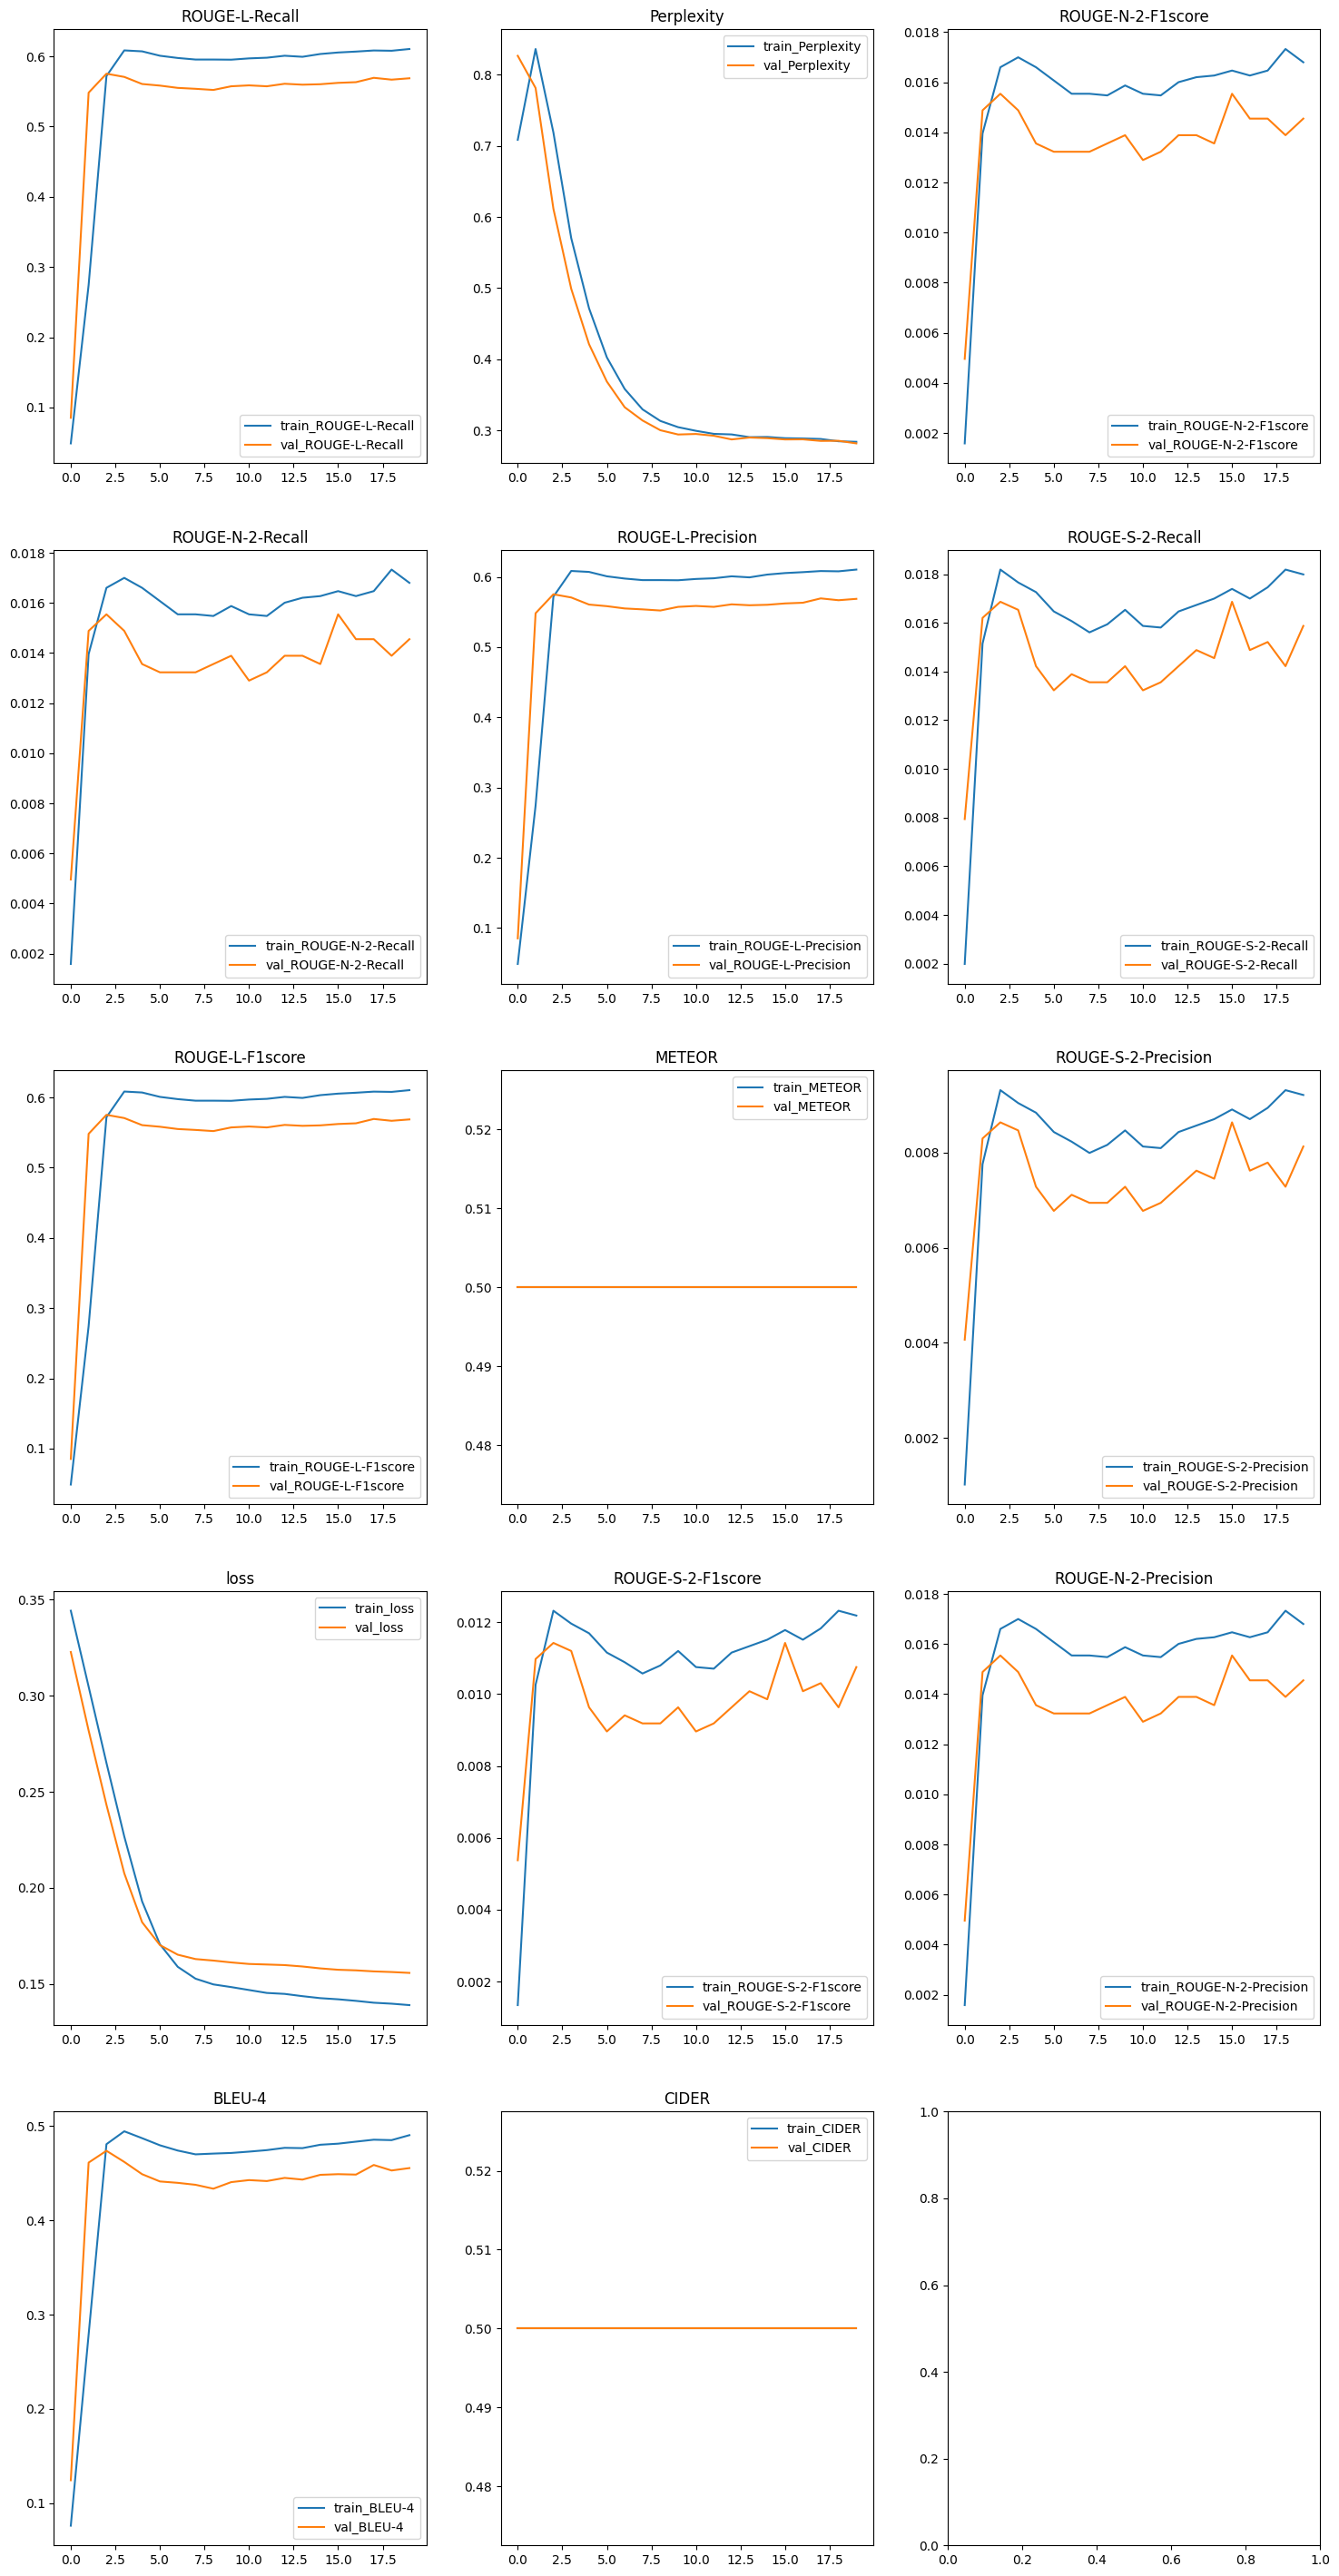

In [2]:
config_path = "./configs/gpt.yaml"
with open(config_path, "r") as stream:
    config_dict = yaml.safe_load(stream)

gpt = GPT(config_dict)
gpt.run()

In [22]:
len(gpt.gpt_ds.word2id.keys())

253

In [26]:
len(gpt.gpt_ds.bpe.vocab_freq.keys())

251

In [23]:
gpt.model.embed_layer.weight.detach().numpy().shape

(256, 64)

In [3]:
gpt_ds = PreprocessGPT(config_dict)
train_text = gpt_ds.get_data()
test_text = gpt_ds.get_test_data()

val_split = config_dict["dataset"]["val_split"]
train_loader, val_loader = create_dataloader(train_text, "train", val_split, batch_size=32, seed=2024)
test_loader = create_dataloader(test_text, "test", batch_size=32, seed=2024)

train_X = next(iter(train_loader))
test_X = next(iter(test_loader))

print(train_X[0].shape, test_X[0].shape)

torch.Size([32, 65]) torch.Size([20, 96])


In [ ]:
gpt = GPTModel(config_dict)
tokens = train_X[0].to(torch.long)
output = gpt(tokens[:, :-1])
print(output.shape)

test_tokens_pred = gpt.generate(test_X[0].to(torch.long))
print(test_tokens_pred.shape)

In [37]:
seq_len = config_dict["dataset"]["seq_len"]
test_tokens = test_X[0].to(torch.long)

num_predict_tokens = config_dict["test"]["predict_tokens"]
seq_len = config_dict["dataset"]["seq_len"]

test_tokens_pred = torch.zeros_like(test_tokens)
test_tokens_pred[:, :seq_len] = test_tokens[:, :seq_len]

for i in tqdm(range(num_predict_tokens)):
    inputs = test_tokens_pred[:, i:i+seq_len].to(torch.long)
    outputs = gpt(inputs)
    new_token = torch.argmax(outputs[:, -1, :], dim=-1)
    test_tokens_pred[:, seq_len+i] = new_token.squeeze()
test_tokens_pred.shape

100%|██████████| 32/32 [00:02<00:00, 13.06it/s]


torch.Size([20, 96])

In [9]:
### Extract Data

main_folder = config_dict["paths"]["input_folder"]
random_lines = config_dict["dataset"]["random_lines"]
num_setns_per_doc = config_dict["dataset"]["num_sents_per_doc"]

text_ls = []

for path in glob.glob(f"{main_folder}\*.txt"):
    with open(path, "r") as f:
        lines = np.array(f.readlines())
    if random_lines:
        ids = np.random.choice(len(lines), num_setns_per_doc, replace=False)
    else:
        ids = np.arange(num_setns_per_doc)
    
    lines = lines[ids]
    text_ls.extend(lines)

300